# Master's thesis 

### National Research University Higher School of Economics

__Field of study:__ Development of a Scoring Model Based on Data from Companies Connected to the Evotor

__Degree programme:__ Business Analytics and Big Data Systems

__Student:__ Turakulov Akramjon

----

### Modules importing

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, roc_curve , auc, precision_score, recall_score, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import shap

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import seaborn as sns
from matplotlib_venn import venn2
import pylab as pl

import optbinning
from optbinning import OptimalBinning, BinningProcess

from statsmodels.stats.outliers_influence import variance_inflation_factor 
# import statsmodels.api as sm
import math
import itertools as it

import warnings
warnings.filterwarnings("ignore")

(CVXPY) May 14 02:30:16 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 14 02:30:16 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


Uploading data on non-defaults

In [2]:
df_non_defaults = pd.read_excel("D:\\HW's\\ДИССЕР\\новые данные\\ready_dataset\\dataset_non_defaults_final.XLSX")
df_non_defaults.head()

,Дефолт,Код налогоплательщика,Год,Размер компании,Среднесписочная численность работников,"Запасы, RUB","Дебиторская задолженность, RUB","Оборотные активы, RUB","Активы всего, RUB","Заёмные средства (долгосрочные), RUB",...,NUM_OF_GOODS_DECR_30DAYS_25PC,NUM_OF_GOODS_DECR_30DAYS_50PC,NUM_OF_CHECKS_DECR_30DAYS_25PC,NUM_OF_CHECKS_DECR_30DAYS_50PC,NUM_OF_SESS_DECR_30DAYS_25PC,NUM_OF_SESS_DECR_30DAYS_50PC,NUM_OF_CATEG_DECR_30DAYS_25PC,NUM_OF_CATEG_DECR_30DAYS_50PC,NON_WORK_DAYS_INCR_30DAYS_25PC,NON_WORK_DAYS_INCR_30DAYS_50PC
0,0,7726728755,2023,Крупные предприятия,49,8.412000e+07,1.232390e+08,2.932730e+08,297165000,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0,7816405237,2023,Крупные предприятия,129,5.871220e+08,1.366533e+09,2.200857e+09,2397350000,895400000.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1659091192,2023,Крупные предприятия,NaN,3.154186e+09,1.273714e+10,1.602463e+10,16598885000,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0,6164106688,2023,Крупные предприятия,197,5.132400e+07,6.086050e+08,8.389800e+08,11898168000,713508000.0,...,0,0,0,0,0,1,0,0,0,0
4,0,7715284716,2023,Средние предприятия,104,2.738230e+08,6.182700e+08,1.482579e+09,1488555000,NaN,...,0,0,0,0,0,0,0,0,0,0


Uploading data on defaults

In [3]:
df_defaults = pd.read_excel("D:\\HW's\\ДИССЕР\\новые данные\\ready_dataset\\dataset_defaults_final.xlsx")
df_defaults.head()

,Дефолт,Код налогоплательщика,Год,Размер компании,Среднесписочная численность работников,"Запасы, RUB","Дебиторская задолженность, RUB","Оборотные активы, RUB","Активы всего, RUB","Заёмные средства (долгосрочные), RUB",...,NUM_OF_GOODS_DECR_30DAYS_25PC,NUM_OF_GOODS_DECR_30DAYS_50PC,NUM_OF_CHECKS_DECR_30DAYS_25PC,NUM_OF_CHECKS_DECR_30DAYS_50PC,NUM_OF_SESS_DECR_30DAYS_25PC,NUM_OF_SESS_DECR_30DAYS_50PC,NUM_OF_CATEG_DECR_30DAYS_25PC,NUM_OF_CATEG_DECR_30DAYS_50PC,NON_WORK_DAYS_INCR_30DAYS_25PC,NON_WORK_DAYS_INCR_30DAYS_50PC
0,1,7202233265,2022,Малые предприятия,2.0,14000.0,20252000.0,20267000.0,20267000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,2343011026,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
2,1,7710155040,2022,Микропредприятия,42.0,95007000.0,26899000.0,124582000.0,130583000.0,3602000.0,...,0,0,0,0,0,0,0,0,0,0
3,1,7725345358,2022,Микропредприятия,3.0,1426000.0,10034000.0,12477000.0,12478000.0,NaN,...,0,0,1,0,0,0,0,0,0,0
4,1,7716924172,2022,Малые предприятия,41.0,8853000.0,NaN,11078000.0,11078000.0,NaN,...,0,0,0,0,0,0,0,0,0,1


### Custom functions

In [4]:
def missing_values_table(df):
    """ 
    Dataframe information output 
    Parameters
    ----------
    df: pandas DataFrame

    Returns
    -------     
    pandas DataFrame
        
    """
    mis_val = df.isnull().sum()
    zero_val = len(df) - df.astype(bool).sum(axis=0)
    unique_val = df.nunique()

    mis_val_percent = 100 * df.isnull().sum() / len(df)
    zero_val_percent = 100 *(len(df) - df.astype(bool).sum(axis=0)) / len(df)
    unique_val_percent = 100 * df.nunique() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent, zero_val, zero_val_percent, unique_val, unique_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missings', 1 : '% Missings', 2 : 'Zeroes', 3 : '% Zeroes', 4 : 'Uniques', 5 : '% Uniques'})

    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
    '% Missings', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns


def vif(data_train, col):
    """ 
    Function for Variance Inflation Factor calculation
    Parameters
    ----------
    data_train: pandas DataFrame
    col : array of columns
    
    Returns
    -------     
    pandas DataFrame
        
    """
    vif = pd.DataFrame()
    df = data_train[col].copy()
    df = df.fillna(0)
    
    vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    labels = vif["features"]
    value = vif["VIF Factor"]
    position = np.arange(len(col))
    fig, ax = plt.subplots()

    ax.barh(position, value, color='#00bbe4')
    ax.set_yticks(position)
    ax.set_yticklabels(labels,fontsize = 15)
    fig.set_figwidth(15)
    fig.set_figheight(10)
    plt.xlabel('VIF factor value')
    plt.ylabel('Features')
    plt.title('Variance inflation factor distribution')
    plt.show()
    plt.show()
    return vif.round(1)

def drop_feature_selection(row, col, corr, row_iv, col_iv):
    if row_iv >= col_iv:
        return col
    else:
        return row
    
def Find_Optimal_Cutoff(target, predicted):
    """ 
    Finding the optimal cutoff probability 
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

def classification_report_with_accuracy_score(y_true, y_pred):
    """ 
    Function for classification_report and roc_auc_score
    Parameters
    ----------
    y_true : target value

    y_pred : predicted target value

    Returns
    -------     
    list type, with roc_auc_score
        
    """
    print(classification_report(y_true, y_pred)) 
    return roc_auc_score(y_true, y_pred)


def plot_graph_and_metrics(y_train, preds_dev, y_valid, preds_val, treshhold_custom=None):
    """ 
    Function for graph and metrics plotting
    Parameters
    ----------
    y_train : train target value

    preds_dev : predicted target value
    
    y_valid : validation target value
    
    preds_val : validation target value
    
    treshhold_custom : custom treshold

    Returns
    -------     
    
    """
    treshhold = Find_Optimal_Cutoff(y_train, preds_dev)
    print('Подобранная величина отсечки:',treshhold)
    if treshhold_custom:
        treshhold = treshhold_custom
    pred = [1 if i > treshhold else 0 for i in preds_val]
    #выводим результаты подгонки моделей
    train_roc_auc_score = roc_auc_score(y_train, preds_dev)
    print('Roc-Auc (Dev):', train_roc_auc_score)
    print('Gini (Dev) :', 2*train_roc_auc_score-1)
    valid_roc_auc_score = roc_auc_score(y_valid, preds_val)
    print('Roc-Auc (Val):', valid_roc_auc_score)
    print('Gini (Val) :', 2*valid_roc_auc_score-1)
    print('Classification report: \n', classification_report(y_valid, pred))
    print('Confusion matrix: \n', confusion_matrix(y_valid, pred))
    tn, fp, fn, tp = confusion_matrix(y_valid, pred).ravel()
    print(f'{tn=}, {fp=}, {fn=}, {tp=}')

    #выводим график ROC кривой
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")
    plt.figure(figsize=(6, 6))
    fpr, tpr, thresholds = roc_curve(y_train, preds_dev)
    fpr1, tpr1, thresholds1 = roc_curve(y_valid, preds_val)

    plt.plot(fpr, tpr, lw=2, color='b', label='Train AUC = {0:.4f}'.format(train_roc_auc_score))
    plt.plot(fpr1, tpr1, lw=2, color='r', label='Valid AUC = {0:.4f}'.format(valid_roc_auc_score))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

def plot_importance(classifer, x_train, point_size = 25):
    """ 
    Function for plotting feature importance
    Parameters
    ----------
    classifer : classifier variable
    x_train : Train features

    Returns
    -------     
    
    """
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importance')
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0, data = imp, s = point_size, color='red').set(xlabel='importance', 
                                                                                                      ylabel='features')

In [5]:
df_non_defaults.columns

Index(['Дефолт', 'Код налогоплательщика', 'Год', 'Размер компании',
       'Среднесписочная численность работников', 'Запасы, RUB',
       'Дебиторская задолженность, RUB', 'Оборотные активы, RUB',
       'Активы  всего, RUB', 'Заёмные средства (долгосрочные), RUB',
       'Долгосрочные обязательства, RUB',
       'Заёмные средства (краткосрочные), RUB',
       'Кредиторская задолженность, RUB', 'Краткосрочные обязательства, RUB',
       'Пассивы всего, RUB', 'Собственный оборотный капитал, RUB',
       'Собственный капитал, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB',
       'Проценты к уплате, RUB', 'Чистая прибыль (убыток), RUB', 'EBIT, RUB',
       'Сальдо денежных потоков от текущих операций, RUB',
       'Оборачиваемость кредиторской задолженности, разы',
       'Оборачиваемость запасов, разы',
       'Оборачиваемость дебиторской задолженности, разы',
       'Коэффициент покрытия процентов по EBIT, %', 'Чистая норма прибыли, %',
       'Рентабельность продаж, %', 'Рентабель

Let's rename the columns to shorter ones

In [6]:
cols_rename = {
    'Дефолт' : 'def_flag'
    ,'Код налогоплательщика' : 'inn'
    ,'Год' : 'year'
    ,'Размер компании' : 'company_size'
    ,'Среднесписочная численность работников' : 'avg_emp_cnt'
    ,'Запасы, RUB' : 'inventories'
    ,'Дебиторская задолженность, RUB' : 'ac_rec'
    ,'Оборотные активы, RUB' : 'cur_assets'
    ,'Активы  всего, RUB' : 'assets'
    ,'Заёмные средства (долгосрочные), RUB' : 'ltd'
    ,'Долгосрочные обязательства, RUB' : 'ltliab'
    ,'Заёмные средства (краткосрочные), RUB' : 'std'
    ,'Кредиторская задолженность, RUB' : 'ac_pay'
    ,'Краткосрочные обязательства, RUB' : 'stliab'
    ,'Пассивы всего, RUB' : 'tle'
    ,'Собственный оборотный капитал, RUB' : 'w_cap'
    ,'Собственный капитал, RUB' : 'equity'
    ,'Выручка, RUB' : 'rev'
    ,'Себестоимость продаж, RUB' : 'cost_of_sales'
    ,'Проценты к уплате, RUB' : 'int_pay'
    ,'Чистая прибыль (убыток), RUB' : 'np'
    ,'EBIT, RUB' : 'ebit'
    ,'Сальдо денежных потоков от текущих операций, RUB' : 'cash_flow_bal_cur'
    ,'Оборачиваемость кредиторской задолженности, разы' : 'ac_rec_turn'
    ,'Оборачиваемость запасов, разы' : 'inv_turn'
    ,'Оборачиваемость дебиторской задолженности, разы' : 'ac_pay_turn'
    ,'Коэффициент покрытия процентов по EBIT, %' : 'icr'
    ,'Чистая норма прибыли, %' : 'npm'
    ,'Рентабельность продаж, %' : 'ros'
    ,'Рентабельность активов (ROA), %' : 'roa'
    ,'Рентабельность капитала (ROE), %' : 'roe'
    ,'Коэффициент текущей ликвидности, %' : 'cash_ratio'
    ,'Коэффициент абсолютной ликвидности, %' : 'cur_ratio'
    ,'Средний чек (Динамика год к году)'  : 'avg_receipt_dynamic'
    ,'Сумма по среднему чеку за текущий год'  : 'avg_receipt_curr'
    ,'NO_CHECKS_30DAYS' : 'no_check_30days' 
    ,'NO_CHECKS_14DAYS' : 'no_check_14days' 
    ,'NO_CHECKS_7DAYS' : 'no_check_7days' 
    ,'NO_CHECKS_3DAYS' : 'no_check_3days' 
    ,'REVENUE_DECREASE_50PC' : 'revenue_decrease_50pc'
    ,'NUM_OF_DEV_DECREASE_1DAYS_1PC' : 'num_of_dev_decrease_1day_1pc'
    ,'NUM_OF_GOODS_DECR_30DAYS_25PC' : 'num_of_goods_decrease_30days_25pc'
    ,'NUM_OF_GOODS_DECR_30DAYS_50PC' : 'num_of_goods_decrease_30days_50pc'
    ,'NUM_OF_CHECKS_DECR_30DAYS_25PC' : 'num_of_check_decrease_30days_25pc'
    ,'NUM_OF_CHECKS_DECR_30DAYS_50PC' : 'num_of_check_decrease_30days_50pc'
    ,'NUM_OF_SESS_DECR_30DAYS_25PC' : 'num_of_sess_decrease_30days_25pc'
    ,'NUM_OF_SESS_DECR_30DAYS_50PC' : 'num_of_sess_decrease_30days_50pc'
    ,'NUM_OF_CATEG_DECR_30DAYS_25PC' : 'num_of_categ_decrease_30days_25pc'
    ,'NUM_OF_CATEG_DECR_30DAYS_50PC' : 'num_of_categ_decrease_30days_50pc'
    ,'NON_WORK_DAYS_INCR_30DAYS_25PC' : 'non_work_days_inc_30days_25pc'
    ,'NON_WORK_DAYS_INCR_30DAYS_50PC' : 'non_work_days_inc_30days_50pc'
}

In [7]:
df_non_defaults = df_non_defaults.rename(columns=cols_rename)
df_non_defaults.head()

,def_flag,inn,year,company_size,avg_emp_cnt,inventories,ac_rec,cur_assets,assets,ltd,...,num_of_goods_decrease_30days_25pc,num_of_goods_decrease_30days_50pc,num_of_check_decrease_30days_25pc,num_of_check_decrease_30days_50pc,num_of_sess_decrease_30days_25pc,num_of_sess_decrease_30days_50pc,num_of_categ_decrease_30days_25pc,num_of_categ_decrease_30days_50pc,non_work_days_inc_30days_25pc,non_work_days_inc_30days_50pc
0,0,7726728755,2023,Крупные предприятия,49,8.412000e+07,1.232390e+08,2.932730e+08,297165000,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0,7816405237,2023,Крупные предприятия,129,5.871220e+08,1.366533e+09,2.200857e+09,2397350000,895400000.0,...,0,0,0,0,0,0,0,0,0,0
2,0,1659091192,2023,Крупные предприятия,NaN,3.154186e+09,1.273714e+10,1.602463e+10,16598885000,NaN,...,0,0,0,0,0,0,0,0,0,0
3,0,6164106688,2023,Крупные предприятия,197,5.132400e+07,6.086050e+08,8.389800e+08,11898168000,713508000.0,...,0,0,0,0,0,1,0,0,0,0
4,0,7715284716,2023,Средние предприятия,104,2.738230e+08,6.182700e+08,1.482579e+09,1488555000,NaN,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_defaults = df_defaults.rename(columns=cols_rename)
df_defaults.head()

,def_flag,inn,year,company_size,avg_emp_cnt,inventories,ac_rec,cur_assets,assets,ltd,...,num_of_goods_decrease_30days_25pc,num_of_goods_decrease_30days_50pc,num_of_check_decrease_30days_25pc,num_of_check_decrease_30days_50pc,num_of_sess_decrease_30days_25pc,num_of_sess_decrease_30days_50pc,num_of_categ_decrease_30days_25pc,num_of_categ_decrease_30days_50pc,non_work_days_inc_30days_25pc,non_work_days_inc_30days_50pc
0,1,7202233265,2022,Малые предприятия,2.0,14000.0,20252000.0,20267000.0,20267000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,2343011026,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
2,1,7710155040,2022,Микропредприятия,42.0,95007000.0,26899000.0,124582000.0,130583000.0,3602000.0,...,0,0,0,0,0,0,0,0,0,0
3,1,7725345358,2022,Микропредприятия,3.0,1426000.0,10034000.0,12477000.0,12478000.0,NaN,...,0,0,1,0,0,0,0,0,0,0
4,1,7716924172,2022,Малые предприятия,41.0,8853000.0,NaN,11078000.0,11078000.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_non_defaults.columns

Index(['def_flag', 'inn', 'year', 'company_size', 'avg_emp_cnt', 'inventories',
       'ac_rec', 'cur_assets', 'assets', 'ltd', 'ltliab', 'std', 'ac_pay',
       'stliab', 'tle', 'w_cap', 'equity', 'rev', 'cost_of_sales', 'int_pay',
       'np', 'ebit', 'cash_flow_bal_cur', 'ac_rec_turn', 'inv_turn',
       'ac_pay_turn', 'icr', 'npm', 'ros', 'roa', 'roe', 'cash_ratio',
       'cur_ratio', 'avg_receipt_dynamic', 'avg_receipt_curr',
       'no_check_30days', 'no_check_14days', 'no_check_7days',
       'no_check_3days', 'revenue_decrease_50pc',
       'num_of_dev_decrease_1day_1pc', 'num_of_goods_decrease_30days_25pc',
       'num_of_goods_decrease_30days_50pc',
       'num_of_check_decrease_30days_25pc',
       'num_of_check_decrease_30days_50pc', 'num_of_sess_decrease_30days_25pc',
       'num_of_sess_decrease_30days_50pc', 'num_of_categ_decrease_30days_25pc',
       'num_of_categ_decrease_30days_50pc', 'non_work_days_inc_30days_25pc',
       'non_work_days_inc_30days_50pc'],
      dty

In [10]:
df_defaults.columns

Index(['def_flag', 'inn', 'year', 'company_size', 'avg_emp_cnt', 'inventories',
       'ac_rec', 'cur_assets', 'assets', 'ltd', 'ltliab', 'std', 'ac_pay',
       'stliab', 'tle', 'w_cap', 'equity', 'rev', 'cost_of_sales', 'int_pay',
       'np', 'ebit', 'cash_flow_bal_cur', 'ac_rec_turn', 'inv_turn',
       'ac_pay_turn', 'icr', 'npm', 'ros', 'roa', 'roe', 'cash_ratio',
       'cur_ratio', 'avg_receipt_dynamic', 'avg_receipt_curr',
       'no_check_30days', 'no_check_14days', 'no_check_7days',
       'no_check_3days', 'revenue_decrease_50pc',
       'num_of_dev_decrease_1day_1pc', 'num_of_goods_decrease_30days_25pc',
       'num_of_goods_decrease_30days_50pc',
       'num_of_check_decrease_30days_25pc',
       'num_of_check_decrease_30days_50pc', 'num_of_sess_decrease_30days_25pc',
       'num_of_sess_decrease_30days_50pc', 'num_of_categ_decrease_30days_25pc',
       'num_of_categ_decrease_30days_50pc', 'non_work_days_inc_30days_25pc',
       'non_work_days_inc_30days_50pc'],
      dty

Combining dataframes

In [11]:
df_all = pd.concat([df_non_defaults, df_defaults])
df_all.shape

(875, 51)

In [12]:
df_all.def_flag.value_counts()

0    794
1     81
Name: def_flag, dtype: int64

### EDA

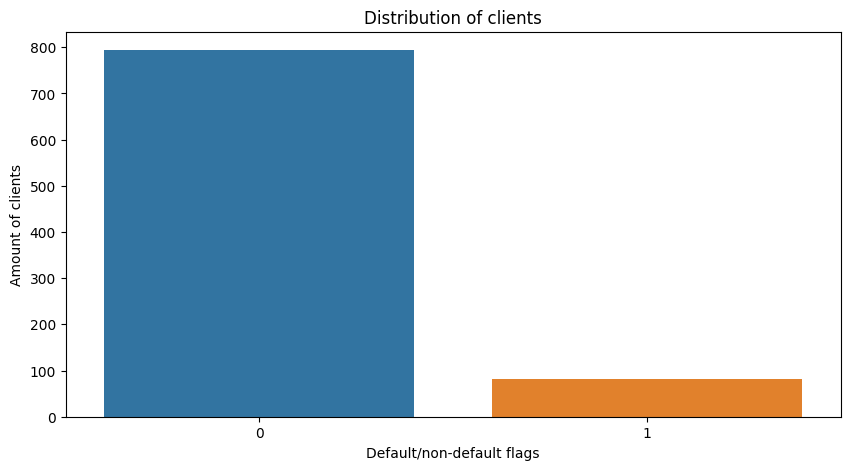

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df_all.def_flag)
plt.title("Distribution of clients")
plt.xlabel('Default/non-default flags')
plt.ylabel('Amount of clients')
plt.show()

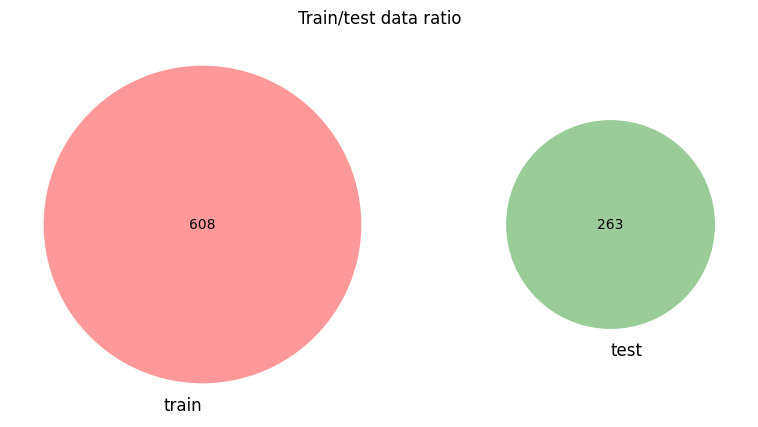

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_all, df_all.def_flag, test_size=0.3, random_state=42, stratify=df_all.def_flag)
fig, ax = plt.subplots(figsize=(10,5))
set1 = set(X_train.inn.unique())
set2 = set(X_test.inn.unique())

venn2([set1, set2], ('train', 'test'))
plt.title("Train/test data ratio")
plt.show()

In [15]:
print(y_train.value_counts())
print(y_test.value_counts())

0    555
1     57
Name: def_flag, dtype: int64
0    239
1     24
Name: def_flag, dtype: int64


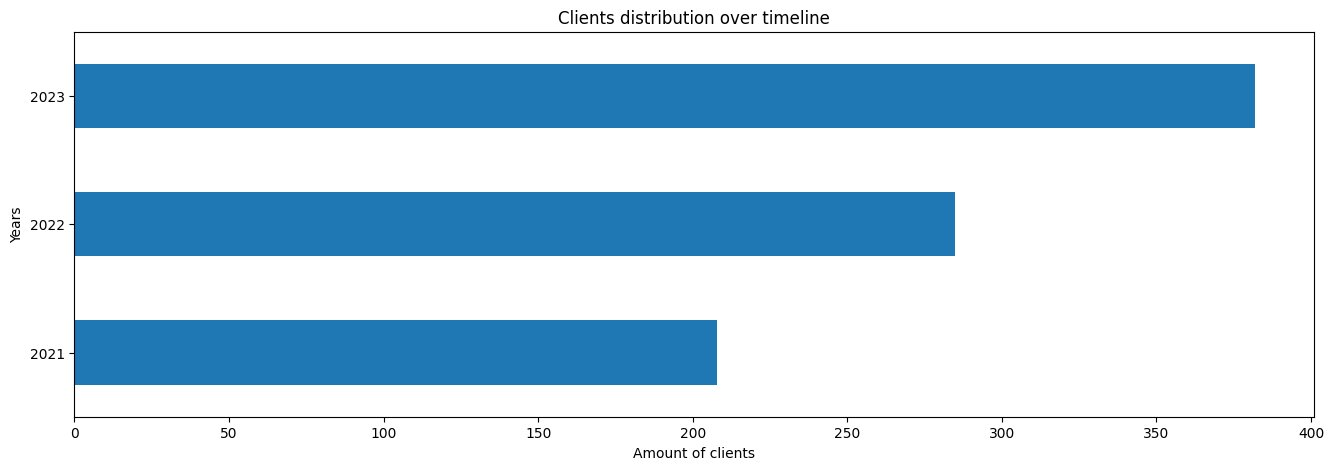

In [16]:
fig, ax = plt.subplots(figsize=(16,5))
df_all.groupby("year")['inn'].count().plot(kind='barh')
plt.title("Clients distribution over timeline")
plt.xlabel('Amount of clients')
plt.ylabel('Years')
plt.show()

### Feature Engineering

In [17]:
##### Profitability
df_all['ebit_margin'] = df_all['ebit'] / df_all['rev'] # EBIT/Выручка

##### Sustainability
df_all['equity_to_nca'] = df_all['equity'] / (df_all['assets'] - df_all['cur_assets']) # Капитал/ (Совокупные активы - Оборотные активы)

##### Debt load
df_all['debt_to_ebit'] = (df_all['ltliab'] + df_all['stliab']) / df_all['ebit'] # (Краткосрочные + Долгосрочные обязательства)/EBIT
df_all['debt_to_assets'] = (df_all['ltliab'] + df_all['stliab']) / df_all['assets'] # (Краткосрочные + Долгосрочные обязательства)/Активы
df_all['equity_to_assets'] = df_all['equity'] / df_all['assets'] # Капитал/Активы
df_all['rev_to_debt'] = df_all['rev'] / (df_all['ltliab'] + df_all['stliab']) # Выручка/(Краткосрочные + Долгосрочные обязательства)
df_all['debt_to_equity'] = (df_all['ltliab'] + df_all['stliab']) / df_all['equity'] # (Краткосрочные + Долгосрочные обязательства)/Капитал

##### Altman's model
df_all['wc'] = df_all['cur_assets'] - (df_all['stliab'] + df_all['ac_pay'] ) # Current Assets - Current Liabilities
df_all['wc_to_assets'] = df_all['wc'] / df_all['assets']  # Working Capital/Total Assets
df_all['ebit_to_assets'] = df_all['ebit'] / df_all['assets'] # EBIT/Total Assets

In [18]:
missing_values_table(df_all).style.background_gradient(cmap='Reds')

Your selected dataframe has 61 columns.
There are 61 columns that have missing values.


,Missings,% Missings,Zeroes,% Zeroes,Uniques,% Uniques
ltd,500,57.100000,0,0.000000,365,41.700000
icr,407,46.500000,0,0.000000,413,47.200000
int_pay,407,46.500000,0,0.000000,457,52.200000
std,400,45.700000,0,0.000000,468,53.500000
cash_flow_bal_cur,360,41.100000,0,0.000000,514,58.700000
debt_to_ebit,344,39.300000,0,0.000000,531,60.700000
rev_to_debt,277,31.700000,0,0.000000,598,68.300000
debt_to_assets,275,31.400000,0,0.000000,600,68.600000
debt_to_equity,275,31.400000,0,0.000000,600,68.600000
ltliab,274,31.300000,0,0.000000,581,66.400000


Making some preprocessing

In [19]:
df_all['avg_emp_cnt']=df_all['avg_emp_cnt'].str.replace(' ', '').fillna(0)
df_all['avg_emp_cnt']=df_all['avg_emp_cnt'].astype(int)
df_all['company_size'].fillna('N/A', inplace = True)
df_all.fillna(0, inplace = True)
df_all = df_all.replace([np.inf, -np.inf], 0)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 80
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   def_flag                           875 non-null    int64  
 1   inn                                875 non-null    int64  
 2   year                               875 non-null    int64  
 3   company_size                       875 non-null    object 
 4   avg_emp_cnt                        875 non-null    int32  
 5   inventories                        875 non-null    float64
 6   ac_rec                             875 non-null    float64
 7   cur_assets                         875 non-null    float64
 8   assets                             875 non-null    float64
 9   ltd                                875 non-null    float64
 10  ltliab                             875 non-null    float64
 11  std                                875 non-null    float64


In [20]:
df_all.describe().T
# .to_excel('rrr.xlsx')

,count,mean,std,min,25%,50%,75%,max
def_flag,875.0,9.257143e-02,2.899967e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
inn,875.0,6.270472e+09,2.105461e+09,2.470037e+08,5.014586e+09,7.703444e+09,7.730621e+09,9.729283e+09
year,875.0,2.022199e+03,7.971623e-01,2.021000e+03,2.022000e+03,2.022000e+03,2.023000e+03,2.023000e+03
avg_emp_cnt,875.0,6.302057e+01,3.693486e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.205000e+03
inventories,875.0,1.582090e+09,2.411531e+10,0.000000e+00,2.608750e+07,1.086520e+08,3.019500e+08,6.954509e+11
ac_rec,875.0,4.404586e+09,9.874254e+10,0.000000e+00,3.841850e+07,1.168380e+08,2.977390e+08,2.899225e+12
cur_assets,875.0,7.426192e+09,1.413217e+11,0.000000e+00,1.368050e+08,3.090080e+08,7.417590e+08,4.116256e+12
assets,875.0,3.232485e+10,8.151993e+11,0.000000e+00,1.654245e+08,3.536010e+08,8.640605e+08,2.403380e+13
ltd,875.0,3.924963e+09,8.797187e+10,-9.080000e+05,0.000000e+00,0.000000e+00,2.717400e+07,2.510047e+12
ltliab,875.0,7.024119e+09,1.719860e+11,-9.080000e+05,0.000000e+00,3.097000e+06,7.165950e+07,5.031069e+12


In [21]:
df_all_nums = df_all[df_all.select_dtypes(include=['int64', 'float64']).columns.to_list()]
df_all_nums.columns

Index(['def_flag', 'inn', 'year', 'inventories', 'ac_rec', 'cur_assets',
       'assets', 'ltd', 'ltliab', 'std', 'ac_pay', 'stliab', 'tle', 'w_cap',
       'equity', 'rev', 'cost_of_sales', 'int_pay', 'np', 'ebit',
       'cash_flow_bal_cur', 'ac_rec_turn', 'inv_turn', 'ac_pay_turn', 'icr',
       'npm', 'ros', 'roa', 'roe', 'cash_ratio', 'cur_ratio',
       'avg_receipt_dynamic', 'avg_receipt_curr', 'no_check_30days',
       'no_check_14days', 'no_check_7days', 'no_check_3days',
       'revenue_decrease_50pc', 'num_of_dev_decrease_1day_1pc',
       'num_of_goods_decrease_30days_25pc',
       'num_of_goods_decrease_30days_50pc',
       'num_of_check_decrease_30days_25pc',
       'num_of_check_decrease_30days_50pc', 'num_of_sess_decrease_30days_25pc',
       'num_of_sess_decrease_30days_50pc', 'num_of_categ_decrease_30days_25pc',
       'num_of_categ_decrease_30days_50pc', 'non_work_days_inc_30days_25pc',
       'non_work_days_inc_30days_50pc', 'ebit_margin', 'equity_to_nca',
       'd

In [22]:
df_all['company_size'].value_counts()

Малые предприятия      238
Микропредприятия       229
Крупные предприятия    196
Средние предприятия    195
N/A                     17
Name: company_size, dtype: int64

In [23]:
df_all.replace({'Крупные предприятия': 'Large'
                , 'Малые предприятия': 'Small'
                , 'Микропредприятия':'Micro'
                , 'Средние предприятия':'Medium'}, inplace=True)
df_all[['inn','company_size','def_flag']].groupby(['company_size','def_flag'])['inn'].count()

company_size  def_flag
Large         0           192
              1             4
Medium        0           194
              1             1
Micro         0           180
              1            49
N/A           0             1
              1            16
Small         0           227
              1            11
Name: inn, dtype: int64

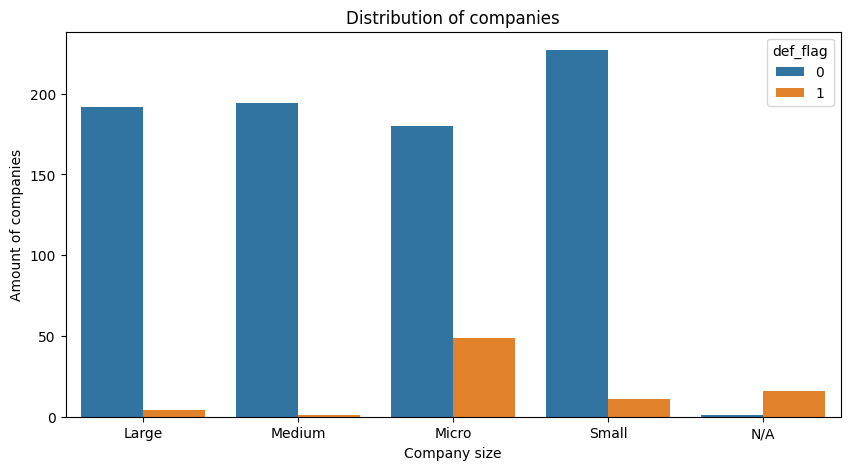

In [24]:
plt.subplots(figsize=(10,5))
sns.countplot(data=df_all, x="company_size", hue="def_flag")

plt.title("Distribution of companies")
plt.xlabel('Company size')
plt.ylabel('Amount of companies')
plt.show()

In [25]:
missing_values_table(df_all_nums).style.background_gradient(cmap='Reds')

Your selected dataframe has 59 columns.
There are 59 columns that have missing values.


,Missings,% Missings,Zeroes,% Zeroes,Uniques,% Uniques
def_flag,0,0.000000,794,90.700000,2,0.200000
num_of_sess_decrease_30days_50pc,0,0.000000,782,89.400000,2,0.200000
avg_receipt_curr,0,0.000000,135,15.400000,663,75.800000
no_check_30days,0,0.000000,652,74.500000,2,0.200000
no_check_14days,0,0.000000,820,93.700000,2,0.200000
no_check_7days,0,0.000000,817,93.400000,2,0.200000
no_check_3days,0,0.000000,817,93.400000,2,0.200000
revenue_decrease_50pc,0,0.000000,837,95.700000,2,0.200000
num_of_dev_decrease_1day_1pc,0,0.000000,771,88.100000,2,0.200000
num_of_goods_decrease_30days_25pc,0,0.000000,867,99.100000,2,0.200000


In [26]:
y = df_all_nums.def_flag
df_all_nums.drop(columns = 'def_flag', inplace = True)

### Single Factor Analysis using all features

In [27]:
SFA_all = pd.DataFrame(columns=['Factor name', 'Coefficient', 'Intercept', 'Roc-Auc', 'Gini'])

for i in range(df_all_nums.shape[1]-1):
    #поочередно выбираем факторы 
    df_all_nums['const'] = 1
    X_train = df_all_nums.iloc[:, [df_all_nums.shape[1] - 1, i]] 
    #нормируем данные
    sc = StandardScaler().fit(X_train)
    X_train_norm = sc.transform(X_train)
    #строим логистическую регрессию
    logistic = LogisticRegression(C=0.001, solver='lbfgs',max_iter=1000)
    logistic.fit(X_train_norm, y)
    logistic.score(X_train_norm, y)
    #выводим результаты
    preds_dev = logistic.predict_proba(X_train_norm)[:, 1]
    print(dict({'Factor name': df_all_nums.columns[i]
                , 'Coefficient': logistic.coef_[0][1]
                , 'Intercept': logistic.intercept_[0]
                , 'Roc-Auc': roc_auc_score(y, preds_dev)
                , 'Gini': (2*roc_auc_score(y, preds_dev)-1)}))
    SFA_all.loc[len(SFA_all)] = [df_all_nums.columns[i]
                         , logistic.coef_[0][1]
                         , logistic.intercept_[0]
                         , roc_auc_score(y, preds_dev)
                         , (2*roc_auc_score(y, preds_dev)-1)]

df_all_nums.drop(columns = ['const'], inplace = True)
SFA_all.set_index('Factor name', inplace=True)
SFA_all.drop(columns = ['Coefficient','Intercept','Roc-Auc'], inplace = True)

{'Factor name': 'inn', 'Coefficient': -0.019713971396719467, 'Intercept': -2.2827917016470507, 'Roc-Auc': 0.5910066237522157, 'Gini': 0.18201324750443137}
{'Factor name': 'year', 'Coefficient': -0.04804241993903318, 'Intercept': -2.283582250742409, 'Roc-Auc': 0.695921572285972, 'Gini': 0.3918431445719439}
{'Factor name': 'inventories', 'Coefficient': -0.004748602501718912, 'Intercept': -2.282644315148396, 'Roc-Auc': 0.8053067761296141, 'Gini': 0.6106135522592282}
{'Factor name': 'ac_rec', 'Coefficient': -0.0033227529160650467, 'Intercept': -2.282639551598899, 'Roc-Auc': 0.8277357962496503, 'Gini': 0.6554715924993006}
{'Factor name': 'cur_assets', 'Coefficient': -0.003897276891193341, 'Intercept': -2.2826413776113728, 'Roc-Auc': 0.8586699629940604, 'Gini': 0.7173399259881208}
{'Factor name': 'assets', 'Coefficient': -0.002984724452667916, 'Intercept': -2.2826385519667514, 'Roc-Auc': 0.8629769568056721, 'Gini': 0.7259539136113442}
{'Factor name': 'ltd', 'Coefficient': -0.0033488674153844

Let's display the Gini graph for each feature

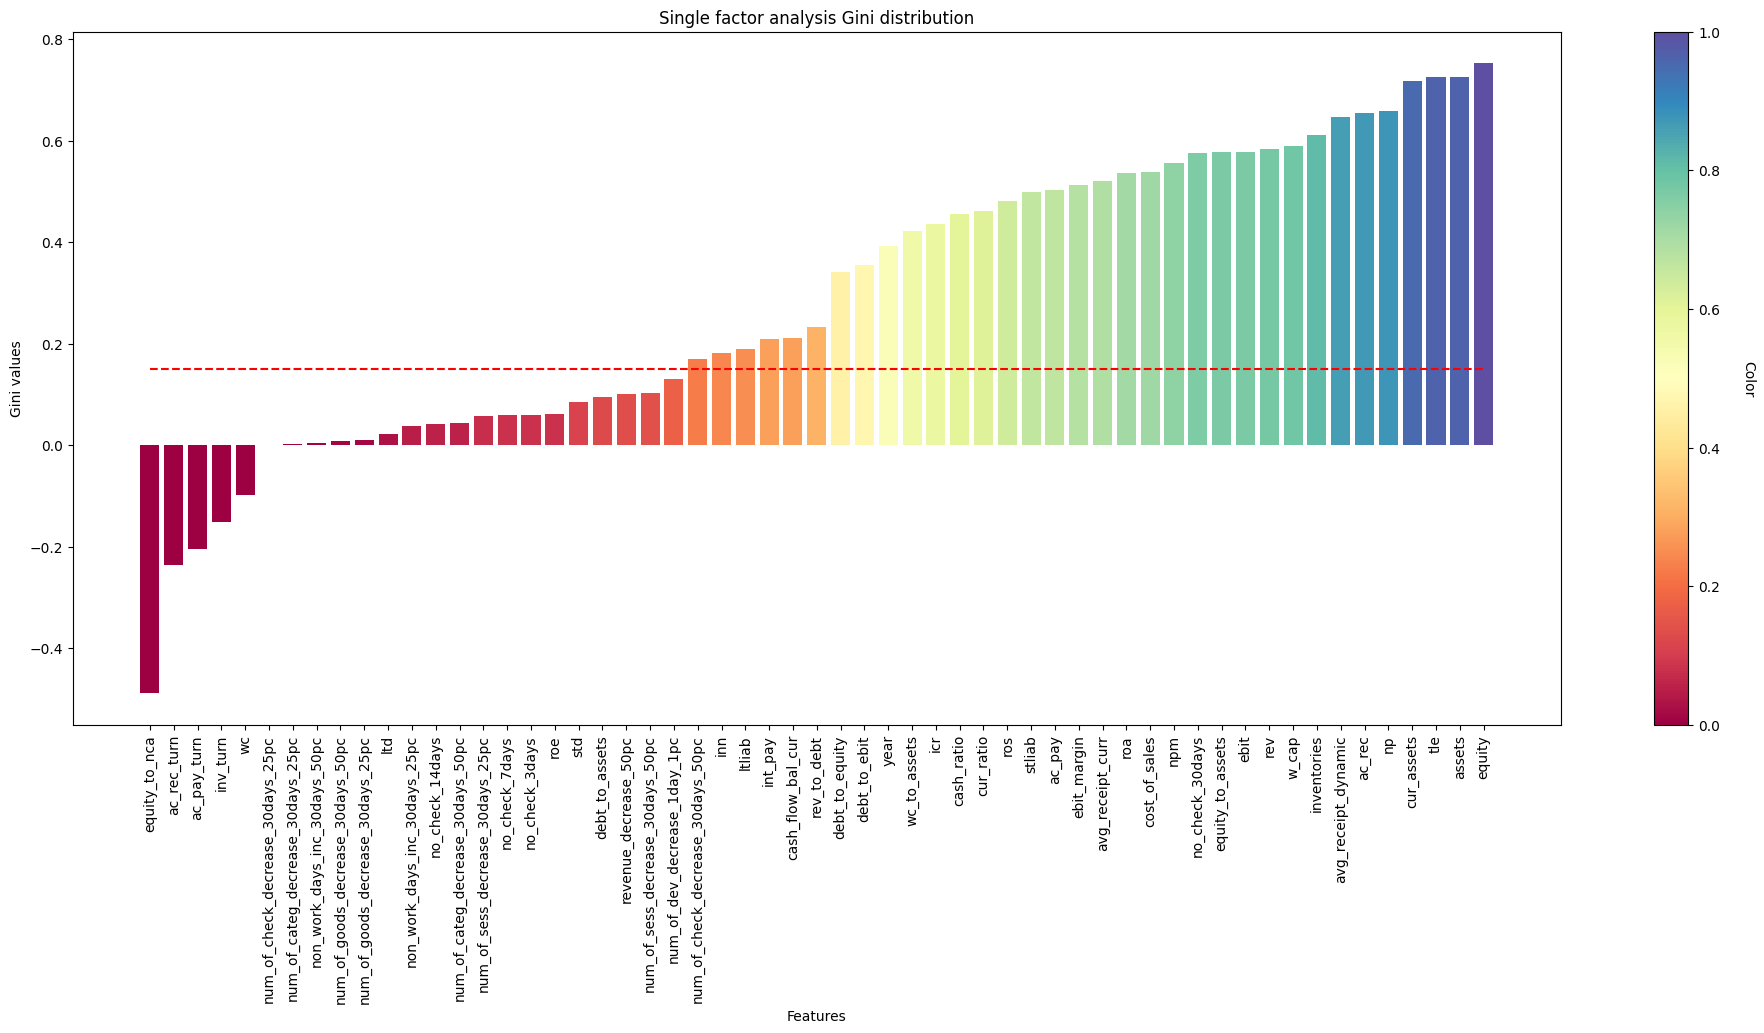

In [28]:
SFA_all = SFA_all.sort_values(by='Gini', ascending=True)
data_x = SFA_all.index
data_hight = SFA_all['Gini'].values
data_color = SFA_all['Gini'].values * 10000


data_color = [x / max(data_color) for x in data_color]
fig, ax = plt.subplots(figsize=(24, 9))

my_cmap = plt.cm.get_cmap('Spectral')
colors = my_cmap(data_color)
rects = ax.bar(data_x, data_hight, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(data_color)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Color', rotation=270,labelpad=25)

plt.xticks(data_x, rotation=90)    
plt.ylabel("Gini values")
plt.xlabel("Features")
plt.title('Single factor analysis Gini distribution')
plt.plot([0,len(data_x)-1], [0.15,0.15],'--',color='red')

plt.show()

Constructing a correlation matrix

Select all features with 'Gini' >= 0.15

In [35]:
df_all_nums_sfa = df_all_nums[SFA_all[SFA_all['Gini'] >= 0.15].index.values]
corr = df_all_nums_sfa.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_of_check_decrease_30days_50pc,inn,ltliab,int_pay,cash_flow_bal_cur,rev_to_debt,debt_to_equity,debt_to_ebit,year,wc_to_assets,icr,cash_ratio,cur_ratio,ros,stliab,ac_pay,ebit_margin,avg_receipt_curr,roa,cost_of_sales,npm,no_check_30days,equity_to_assets,ebit,rev,w_cap,inventories,avg_receipt_dynamic,ac_rec,np,cur_assets,tle,assets,equity
num_of_check_decrease_30days_50pc,1.000000,-0.035491,-0.010986,-0.012699,-0.007042,-0.010018,0.015849,-0.010742,-0.079076,-0.166451,-0.013627,-0.021441,0.005964,-0.005114,-0.014715,-0.015572,0.001866,-0.021211,-0.009239,-0.017188,0.005810,0.028107,-0.164791,-0.014029,-0.015544,-0.011028,-0.015358,-0.016862,-0.011420,-0.012623,-0.013177,-0.010559,-0.010560,-0.009766
inn,-0.035491,1.000000,0.022276,0.021232,0.026234,-0.053029,0.043905,0.027697,0.054350,0.134571,0.031293,0.015018,-0.002300,-0.006535,0.021055,0.020292,0.046629,0.040465,-0.020068,0.021243,0.047898,0.000300,0.101349,0.023085,0.023327,0.024167,0.022656,-0.012542,0.023058,0.019499,0.022799,0.023038,0.023036,0.023398
ltliab,-0.010986,0.022276,1.000000,0.991227,0.914448,-0.001547,-0.001594,-0.001638,0.024836,0.007835,-0.001959,-0.005352,-0.005355,0.003656,0.982822,0.970938,0.001328,-0.009424,-0.001391,0.967292,0.001720,-0.009287,0.020882,0.912473,0.983945,0.989804,0.974080,-0.002865,0.999320,0.995776,0.998470,0.997695,0.997695,0.992516
int_pay,-0.012699,0.021232,0.991227,1.000000,0.854748,-0.001846,-0.001637,-0.002030,0.015704,0.007548,-0.002517,-0.006540,-0.006383,0.003677,0.997850,0.992969,0.001628,-0.009620,-0.001672,0.981121,0.001975,0.001812,0.019531,0.865332,0.985364,0.963955,0.958268,-0.003293,0.987068,0.994892,0.992958,0.980271,0.980271,0.967927
cash_flow_bal_cur,-0.007042,0.026234,0.914448,0.854748,1.000000,-0.000953,0.000060,-0.000892,0.044929,0.008000,0.000973,-0.003017,-0.003325,0.004067,0.829575,0.798742,0.000956,-0.005689,-0.000855,0.832008,0.001047,-0.033614,0.021633,0.968904,0.882703,0.959778,0.929163,-0.001818,0.924719,0.885049,0.905661,0.939345,0.939345,0.956419
rev_to_debt,-0.010018,-0.053029,-0.001547,-0.001846,-0.000953,1.000000,-0.002275,-0.001717,-0.006765,0.021446,-0.001638,-0.002399,0.005479,0.001522,-0.002195,-0.002398,0.001625,0.027494,0.004128,0.030582,0.001543,-0.021727,0.020033,0.054576,0.019783,-0.001523,-0.002321,-0.000500,-0.001668,0.015583,-0.001917,-0.001492,-0.001492,-0.001365
debt_to_equity,0.015849,0.043905,-0.001594,-0.001637,0.000060,-0.002275,1.000000,0.017933,-0.054502,-0.003213,-0.002009,0.002386,-0.005336,-0.005507,0.000293,0.001776,0.001634,0.009956,-0.001839,-0.000664,0.000951,0.078552,-0.014059,-0.002595,-0.001096,-0.003409,-0.001326,-0.004271,-0.001579,-0.002170,-0.000582,-0.001536,-0.001536,-0.001770
debt_to_ebit,-0.010742,0.027697,-0.001638,-0.002030,-0.000892,-0.001717,0.017933,1.000000,-0.008475,-0.024975,-0.002246,-0.006357,-0.006179,0.000434,-0.001775,-0.001513,0.001376,-0.002926,-0.001500,-0.002860,0.001369,0.057260,-0.015470,-0.002447,-0.002520,-0.001691,-0.002433,-0.002844,-0.001359,-0.001991,-0.001761,-0.001505,-0.001505,-0.001416
year,-0.079076,0.054350,0.024836,0.015704,0.044929,-0.006765,-0.054502,-0.008475,1.000000,0.133797,0.033111,0.035861,0.035968,-0.034489,0.009110,0.004691,0.049645,0.144860,0.033972,0.002205,0.045380,-0.307268,0.142225,0.031018,0.010817,0.031135,0.014427,0.062049,0.025788,0.019910,0.020327,0.028442,0.028442,0.032109
wc_to_assets,-0.166451,0.134571,0.007835,0.007548,0.008000,0.021446,-0.003213,-0.024975,0.133797,1.000000,0.006842,0.129657,0.130050,0.061332,0.005829,0.004890,0.205497,0.025012,0.007316,0.009530,0.218237,-0.222816,0.915653,0.020022,0.009333,0.011193,0.010844,0.037112,0.008023,0.010990,0.009036,0.008018,0.008018,0.008336


Remove features with high correlation

Keep chips with higher Gini

In [36]:
corr_drop_cols = ['assets','tle','cur_assets','np','ac_rec','inventories','w_cap','rev'
                  ,'ebit','cost_of_sales','ebit_margin','stliab','ac_pay', 'wc_to_assets'
                  ,'ltliab', 'inn','cash_ratio','year','int_pay','cash_flow_bal_cur']
df_all_nums_sfa.drop(columns = corr_drop_cols , inplace = True)
corr = df_all_nums_sfa.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_of_check_decrease_30days_50pc,rev_to_debt,debt_to_equity,debt_to_ebit,icr,cur_ratio,ros,avg_receipt_curr,roa,npm,no_check_30days,equity_to_assets,avg_receipt_dynamic,equity
num_of_check_decrease_30days_50pc,1.000000,-0.010018,0.015849,-0.010742,-0.013627,0.005964,-0.005114,-0.021211,-0.009239,0.005810,0.028107,-0.164791,-0.016862,-0.009766
rev_to_debt,-0.010018,1.000000,-0.002275,-0.001717,-0.001638,0.005479,0.001522,0.027494,0.004128,0.001543,-0.021727,0.020033,-0.000500,-0.001365
debt_to_equity,0.015849,-0.002275,1.000000,0.017933,-0.002009,-0.005336,-0.005507,0.009956,-0.001839,0.000951,0.078552,-0.014059,-0.004271,-0.001770
debt_to_ebit,-0.010742,-0.001717,0.017933,1.000000,-0.002246,-0.006179,0.000434,-0.002926,-0.001500,0.001369,0.057260,-0.015470,-0.002844,-0.001416
icr,-0.013627,-0.001638,-0.002009,-0.002246,1.000000,-0.006883,0.004293,0.079151,-0.001747,0.002310,-0.023982,0.012030,-0.002448,-0.000954
cur_ratio,0.005964,0.005479,-0.005336,-0.006179,-0.006883,1.000000,0.024932,-0.001708,-0.005047,0.012518,-0.055707,0.137255,0.047786,-0.004612
ros,-0.005114,0.001522,-0.005507,0.000434,0.004293,0.024932,1.000000,0.002963,0.001417,0.053800,-0.068263,0.060880,-0.001768,0.003877
avg_receipt_curr,-0.021211,0.027494,0.009956,-0.002926,0.079151,-0.001708,0.002963,1.000000,0.027645,0.012722,-0.066685,0.023800,-0.001900,-0.008805
roa,-0.009239,0.004128,-0.001839,-0.001500,-0.001747,-0.005047,0.001417,0.027645,1.000000,0.001427,-0.019880,0.036803,-0.002004,-0.001233
npm,0.005810,0.001543,0.000951,0.001369,0.002310,0.012518,0.053800,0.012722,0.001427,1.000000,-0.068668,0.179655,0.000791,0.001523


### Studying the distribution of features with a pairplot

In [37]:
best_features = df_all_nums_sfa.columns.tolist()
best_features.append('def_flag')
sns.pairplot(df_all[pairplot], hue="def_flag")

['num_of_check_decrease_30days_50pc', 'rev_to_debt', 'debt_to_equity', 'debt_to_ebit', 'icr', 'cur_ratio', 'ros', 'avg_receipt_curr', 'roa', 'npm', 'no_check_30days', 'equity_to_assets', 'avg_receipt_dynamic', 'equity', 'def_flag']


Let's compare uncorrelated features (with the highest Gini level) with the target

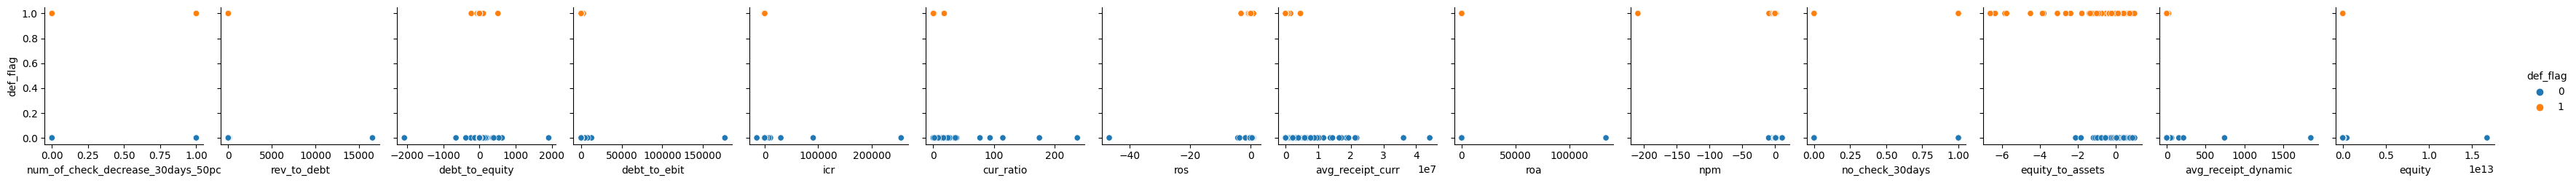

In [38]:
sns.pairplot(
    df_all[best_features],
    x_vars=df_all_nums_sfa.columns.tolist(),
    y_vars=["def_flag"],
    hue="def_flag"
)

Построим pairplot чтобы посмотреть зависимость данных из эвотора между собой

## Information Value (IV)

Let's calculate IV to get information about the significance of the features

Let's take only those features which are uncorrelated with each other and have high Gini after SFA

I tried to add categorical features, but there are some doubts about their importance, so let's take only those features which are uncorrelated and have high Gini after SFA

In [39]:
df_all_best_features = df_all[best_features].copy()
train_cols = df_all_best_features.columns.tolist()
train_cols

['num_of_check_decrease_30days_50pc',
 'rev_to_debt',
 'debt_to_equity',
 'debt_to_ebit',
 'icr',
 'cur_ratio',
 'ros',
 'avg_receipt_curr',
 'roa',
 'npm',
 'no_check_30days',
 'equity_to_assets',
 'avg_receipt_dynamic',
 'equity',
 'def_flag']

In [40]:
iv_score_dict = {}

for col in train_cols:
    if col != 'def_flag':
        optb = optbinning.OptimalBinning(dtype='numerical')
        optb.fit(df_all[col], df_all['def_flag'])
        binning_table = optb.binning_table
        binning_table.build()
        iv_score_dict[col] = binning_table.iv


iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)
iv_score_df

equity                               2.762039
avg_receipt_dynamic                  1.918803
equity_to_assets                     1.657873
roa                                  1.552664
no_check_30days                      1.515372
npm                                  1.370430
icr                                  1.265137
avg_receipt_curr                     1.079151
ros                                  1.055673
cur_ratio                            1.050805
debt_to_equity                       0.902036
debt_to_ebit                         0.874605
rev_to_debt                          0.398073
num_of_check_decrease_30days_50pc    0.276391
dtype: float64

IV is always a positive value. Based on the IV, the significance of the trait is determined by the following methodology:

IV <0.02 - none;  
0,02≤IV<0,1 - low;    
0,1≤IV<0,3 - medium;   
IV≥0,3 - high.   

In our case, we see that the selected after SFA fiches have high significance

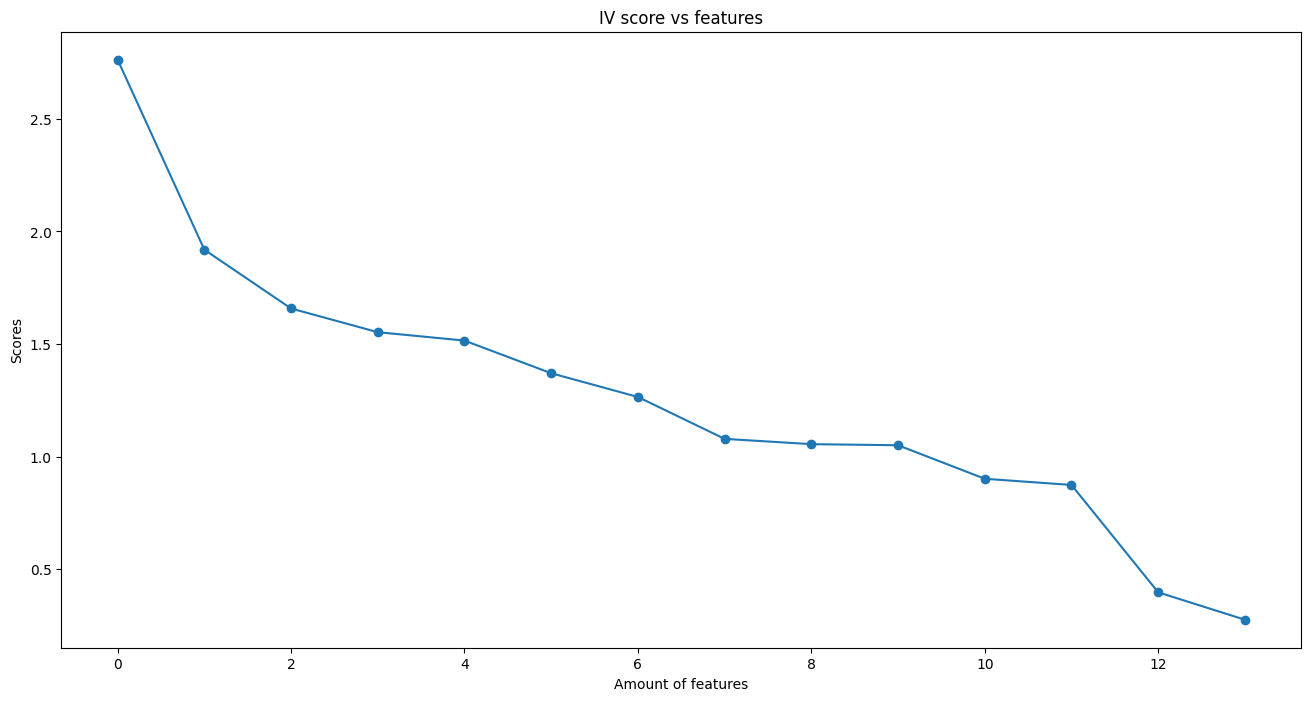

In [41]:
# iv score vs features
fig, ax = plt.subplots(figsize=(16,8))
iv_score_df.reset_index(drop=True).plot(marker='o')
plt.title("IV score vs features")
plt.xlabel('Amount of features')
plt.ylabel('Scores')
plt.show()

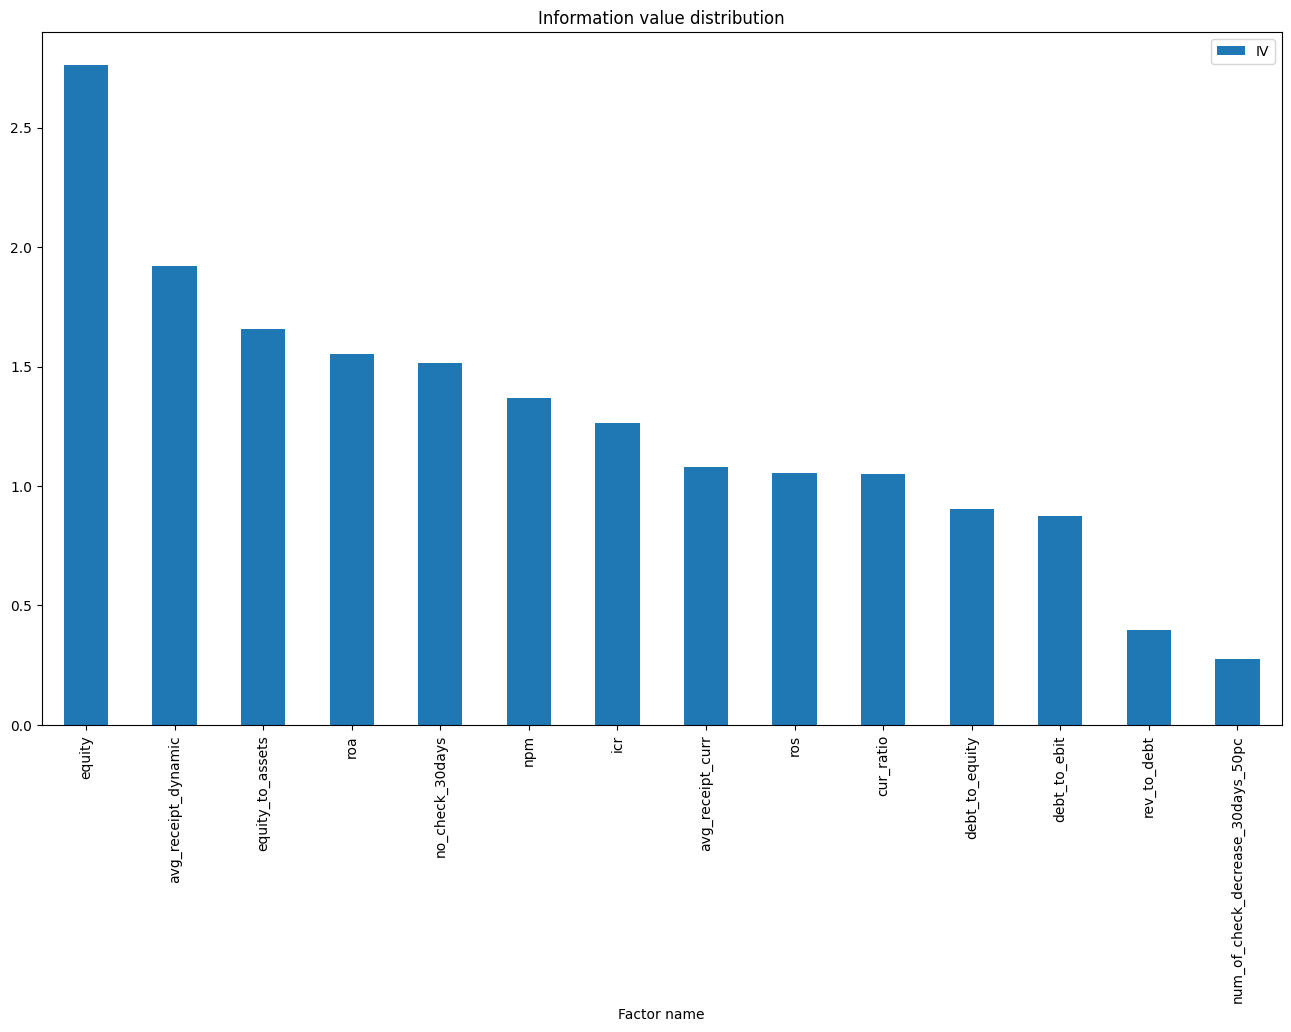

In [42]:
iv_score_df_r = pd.DataFrame([iv_score_df])
iv_score_df_r = iv_score_df_r.T.reset_index()
iv_score_df_r.rename(columns={'index': 'Factor name', 0: 'IV'}, inplace=True)
iv_score_df_r.set_index('Factor name', inplace=True)
iv_score_df_r.plot(kind='bar', title = 'Information value distribution', figsize = (16,9), rot=90);

Let's take all the features that have significance more than 0.2

In [43]:
iv_score_df = iv_score_df.loc[iv_score_df >= 0.2]
print(iv_score_df.shape)
iv_score_df

(14,)


equity                               2.762039
avg_receipt_dynamic                  1.918803
equity_to_assets                     1.657873
roa                                  1.552664
no_check_30days                      1.515372
npm                                  1.370430
icr                                  1.265137
avg_receipt_curr                     1.079151
ros                                  1.055673
cur_ratio                            1.050805
debt_to_equity                       0.902036
debt_to_ebit                         0.874605
rev_to_debt                          0.398073
num_of_check_decrease_30days_50pc    0.276391
dtype: float64

### VIF analysis

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis

In [44]:
df_all[iv_score_df.index.tolist()]

,equity,avg_receipt_dynamic,equity_to_assets,roa,no_check_30days,npm,icr,avg_receipt_curr,ros,cur_ratio,debt_to_equity,debt_to_ebit,rev_to_debt,num_of_check_decrease_30days_50pc
0,77586000,6.421053,0.261087,0.1580,0,0.0158,3228.3889,12200,0.0023,0.3850,2.830137,3.778613,12.577164,0
1,417949000,1.477387,0.174338,0.0534,0,0.0099,2.7974,117600,0.0262,0.1799,4.735987,8.695886,6.099951,0
2,290146000,0.789427,0.017480,0.0216,0,0.0068,14.1716,2142900,0.0479,0.0018,56.208733,28.465450,3.116461,0
3,651213000,1.698659,0.054732,0.0029,0,0.0140,1.0937,734500,-0.0260,0.0112,17.270778,47.555835,0.357540,0
4,1007672000,0.069812,0.676946,0.1491,0,0.1216,0.0000,33000,0.0426,1.2525,0.477222,2.418138,3.580769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-4728000,0.505263,-0.900400,-0.7289,0,-0.3691,-14.4061,4800,0.0256,0.0075,0.000000,0.000000,0.000000,0
77,263414000,-2.828946,0.148545,0.1136,1,0.0229,0.0000,176600,0.0116,0.1147,0.000000,0.000000,0.000000,0
78,-462468000,-1.157951,-6.631697,-0.9964,1,-1.1770,-9.6173,3300,-0.2271,0.0001,0.000000,0.000000,0.000000,1
79,2263000,-2.825233,0.127106,0.0072,1,0.0037,0.0000,14000,0.0210,0.0109,6.867433,0.000000,2.212149,0


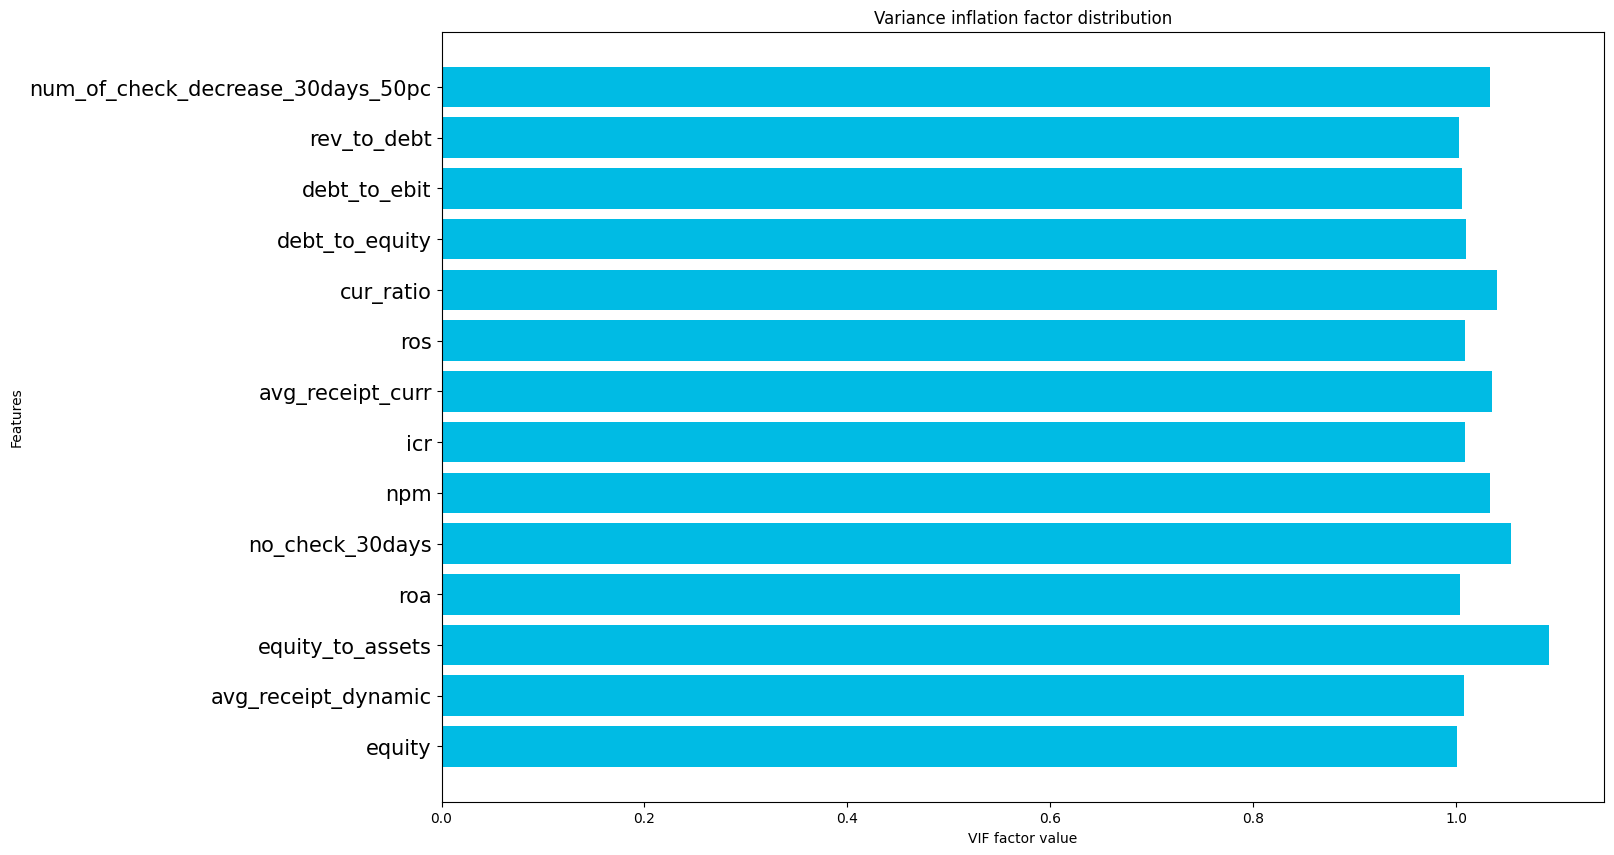

,VIF Factor,features
0,1.0,equity
1,1.0,avg_receipt_dynamic
2,1.1,equity_to_assets
3,1.0,roa
4,1.1,no_check_30days
5,1.0,npm
6,1.0,icr
7,1.0,avg_receipt_curr
8,1.0,ros
9,1.0,cur_ratio


In [45]:
vif_cols = df_all[df_all[iv_score_df.index].select_dtypes(include=['int64', 'float64']).columns.to_list()].columns
vif_df = vif(df_all[vif_cols], df_all[vif_cols].columns)
vif_df

After performing the VIF analysis, we can see that the value of the selected features is below 2, which indicates a low level of multicollinearity

## WOE

Let's look at the WOE chart for each feature

----------------------------------------------------------------------------------------------------
################ Feature Name :  equity





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 458500.00)",103,0.117714,58,45,0.436893,-2.028854,0.978938,0.104929
1,"[458500.00, 5551500.00)",53,0.060571,36,17,0.320755,-1.532329,0.252124,0.028754
2,"[5551500.00, 20252500.00)",62,0.070857,54,8,0.129032,-0.373092,0.011475,0.001426
3,"[20252500.00, 61176000.00)",130,0.148571,124,6,0.046154,0.745888,0.061235,0.007482
4,"[61176000.00, 340274992.00)",338,0.386286,334,4,0.011834,2.142212,0.795344,0.083921
5,"[340274992.00, inf)",189,0.216000,188,1,0.005291,2.953808,0.662923,0.061775
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,2.762039,0.288287


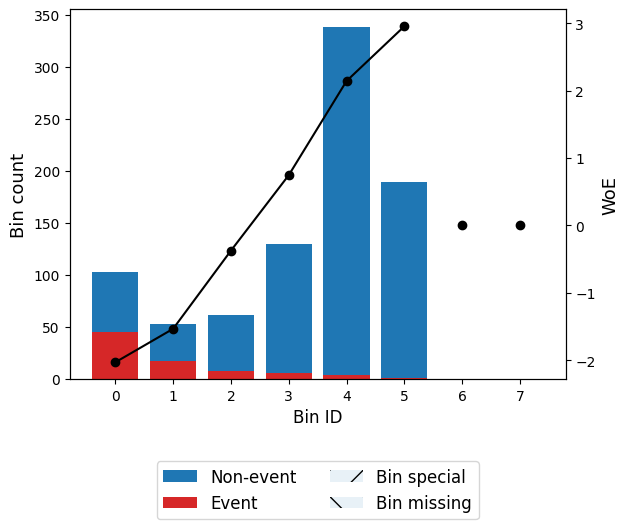

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  avg_receipt_dynamic





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.00)",187,0.213714,126,61,0.326203,-1.557226,0.925609,0.105267
1,"[0.00, 0.65)",124,0.141714,117,7,0.056452,0.533629,0.032517,0.004017
2,"[0.65, 1.05)",122,0.139429,120,2,0.016393,1.81171,0.229077,0.025266
3,"[1.05, 1.61)",216,0.246857,214,2,0.009259,2.390195,0.585191,0.059563
4,"[1.61, 4.25)",180,0.205714,173,7,0.038889,0.924747,0.121571,0.014677
5,"[4.25, inf)",46,0.052571,44,2,0.043478,0.808408,0.024838,0.003023
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.918803,0.211813


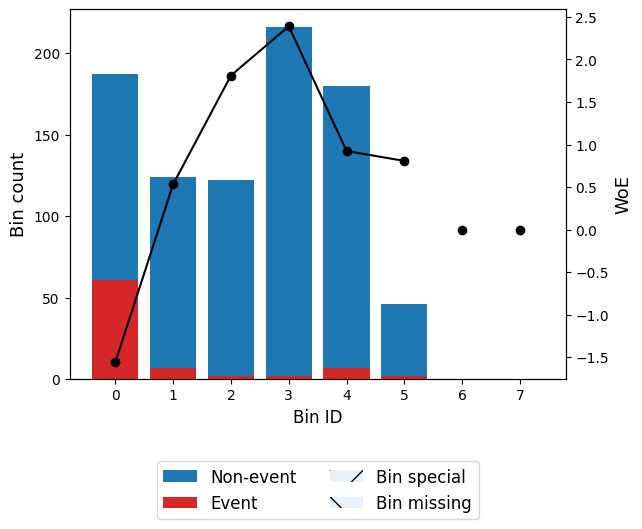

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  equity_to_assets





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.33)",46,0.052571,16,30,0.652174,-2.911243,1.019573,0.095667
1,"[-0.33, 0.00)",52,0.059429,41,11,0.211538,-0.966958,0.081384,0.009794
2,"[0.00, 0.13)",189,0.216000,169,20,0.105820,-0.148468,0.005058,0.000632
3,"[0.13, 0.18)",50,0.057143,47,3,0.060000,0.468901,0.010389,0.001287
4,"[0.18, 0.24)",54,0.061714,52,2,0.037037,0.975462,0.039799,0.004787
5,"[0.24, 0.74)",330,0.377143,318,12,0.036364,0.99451,0.250970,0.030139
6,"[0.74, 0.93)",100,0.114286,98,2,0.020000,1.609186,0.158882,0.017961
7,"[0.93, inf)",54,0.061714,53,1,0.018519,1.687658,0.091817,0.010284
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


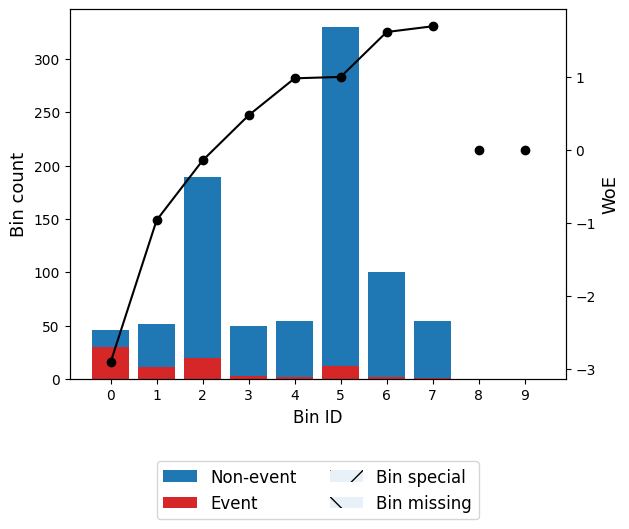

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  roa





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.05)",74,0.084571,40,34,0.459459,-2.120115,0.783118,0.082888
1,"[-0.05, 0.01)",172,0.196571,147,25,0.145349,-0.511078,0.063120,0.007805
2,"[0.01, 0.01)",44,0.050286,41,3,0.068182,0.332325,0.004852,0.000604
3,"[0.01, 0.03)",87,0.099429,86,1,0.011494,2.171713,0.208412,0.021899
4,"[0.03, 0.42)",454,0.518857,441,13,0.028634,1.241461,0.490280,0.057630
5,"[0.42, inf)",44,0.050286,39,5,0.113636,-0.228511,0.002882,0.000359
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.552664,0.171186


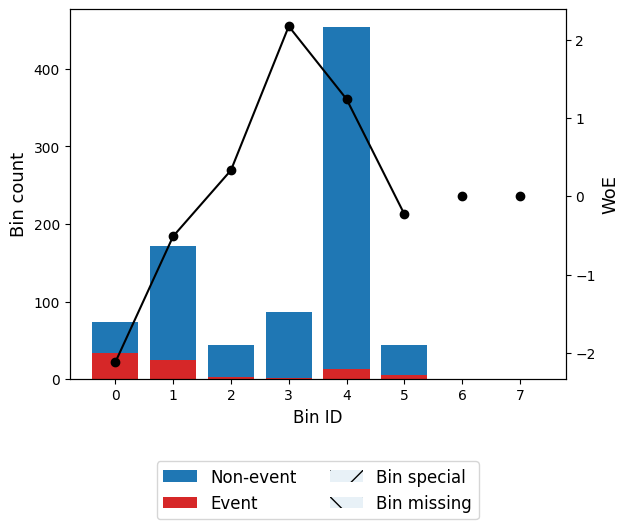

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  no_check_30days





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",652,0.745143,634,18,0.027607,1.279043,0.737069,0.086326
1,"[0.50, inf)",223,0.254857,160,63,0.282511,-1.350595,0.778303,0.090508
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.515372,0.176834


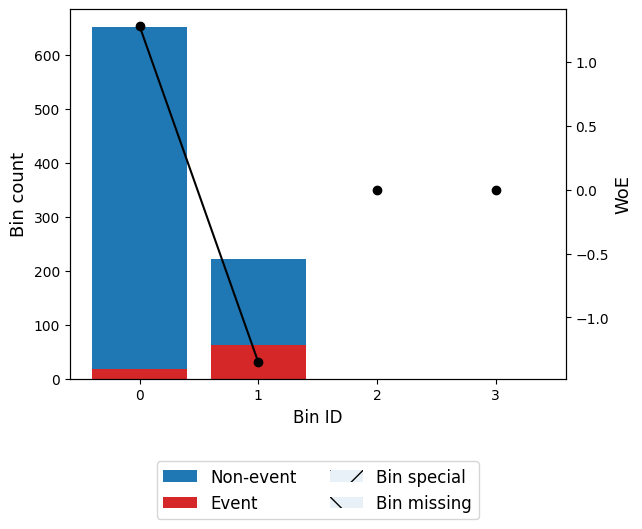

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  npm





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.10)",62,0.070857,33,29,0.467742,-2.153423,0.681479,0.071793
1,"[-0.10, -0.01)",44,0.050286,34,10,0.227273,-1.058859,0.085382,0.010201
2,"[-0.01, 0.01)",153,0.174857,135,18,0.117647,-0.267731,0.013975,0.001742
3,"[0.01, 0.05)",259,0.296000,243,16,0.061776,0.437838,0.047512,0.005892
4,"[0.05, 0.08)",118,0.134857,114,4,0.033898,1.06727,0.100531,0.012002
5,"[0.08, inf)",239,0.273143,235,4,0.016736,1.790657,0.441553,0.048831
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.370430,0.150460


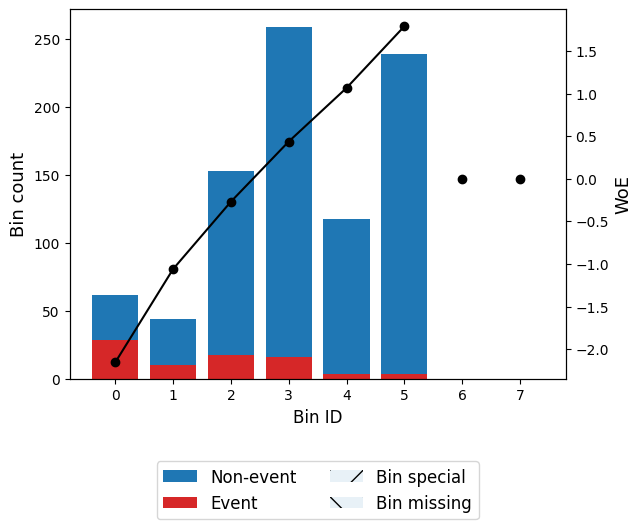

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  icr





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.04)",48,0.054857,31,17,0.354167,-1.68186,0.287318,0.032203
1,"[-0.04, 1.16)",499,0.570286,438,61,0.122244,-0.311289,0.062709,0.007807
2,"[1.16, 2.79)",65,0.074286,64,1,0.015385,1.876249,0.128071,0.014009
3,"[2.79, inf)",263,0.300571,261,2,0.007605,2.588739,0.787039,0.077724
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.265137,0.131742


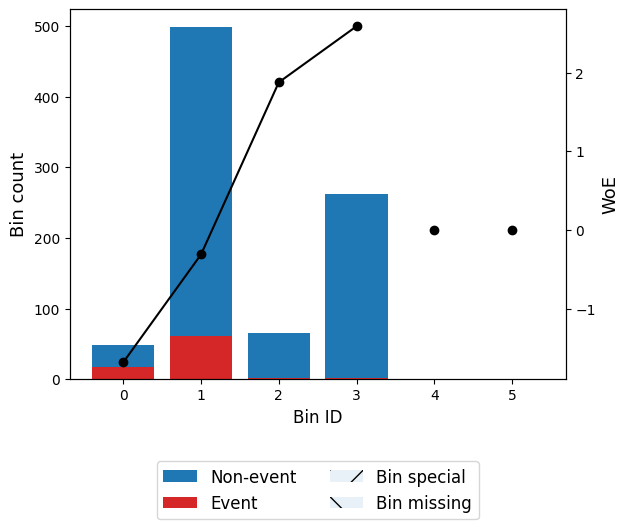

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  avg_receipt_curr





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1300.00)",156,0.178286,114,42,0.269231,-1.284105,0.481465,0.056362
1,"[1300.00, 4850.00)",50,0.057143,41,9,0.180000,-0.766287,0.045574,0.005561
2,"[4850.00, 28000.00)",103,0.117714,93,10,0.097087,-0.05262,0.000333,0.000042
3,"[28000.00, 191900.00)",241,0.275429,230,11,0.045643,0.75755,0.116564,0.014232
4,"[191900.00, 264250.00)",44,0.050286,42,2,0.045455,0.761888,0.021489,0.002623
5,"[264250.00, 374300.00)",46,0.052571,44,2,0.043478,0.808408,0.024838,0.003023
6,"[374300.00, 804750.00)",89,0.101714,86,3,0.033708,1.073101,0.076486,0.009127
7,"[804750.00, inf)",146,0.166857,144,2,0.013699,1.994032,0.312403,0.033644
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


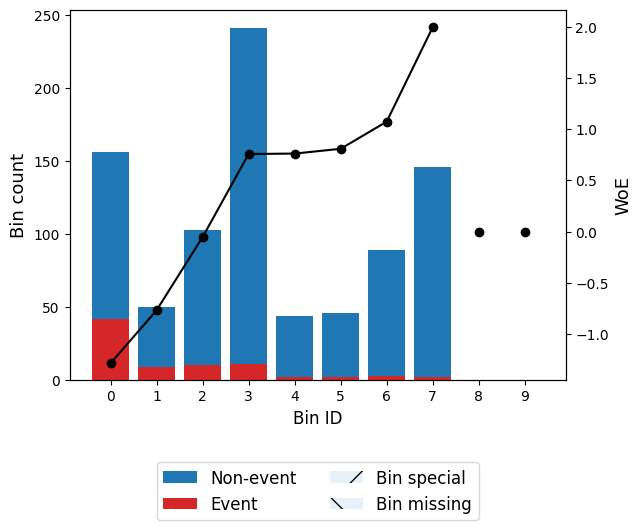

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  ros





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.17)",44,0.050286,24,20,0.454545,-2.100313,0.455110,0.048304
1,"[-0.17, 0.00)",119,0.136000,93,26,0.218487,-1.008131,0.205517,0.024654
2,"[0.00, 0.03)",174,0.198857,162,12,0.068966,0.320055,0.017885,0.002226
3,"[0.03, 0.06)",119,0.136000,111,8,0.067227,0.347454,0.014257,0.001773
4,"[0.06, 0.12)",159,0.181714,151,8,0.050314,0.655204,0.059893,0.007355
5,"[0.12, inf)",260,0.297143,253,7,0.026923,1.304845,0.303011,0.035399
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.055673,0.119712


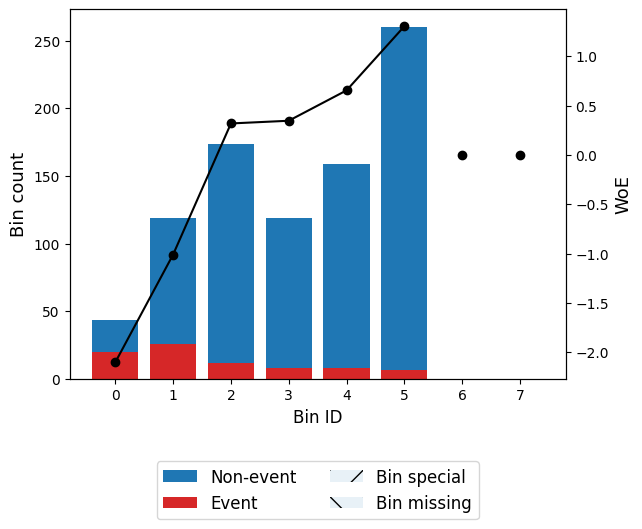

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  cur_ratio





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.00)",46,0.052571,24,22,0.478261,-2.195623,0.529976,0.055499
1,"[0.00, 0.01)",106,0.121143,88,18,0.169811,-0.695669,0.077491,0.009496
2,"[0.01, 0.02)",59,0.067429,54,5,0.084746,0.096912,0.000609,0.000076
3,"[0.02, 0.11)",259,0.296000,238,21,0.081081,0.145114,0.005875,0.000734
4,"[0.11, 0.22)",82,0.093714,76,6,0.073171,0.25634,0.005548,0.000692
5,"[0.22, 1.40)",224,0.256000,216,8,0.035714,1.013203,0.175563,0.021052
6,"[1.40, inf)",99,0.113143,98,1,0.010101,2.302333,0.255743,0.026371
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,1.050805,0.113919


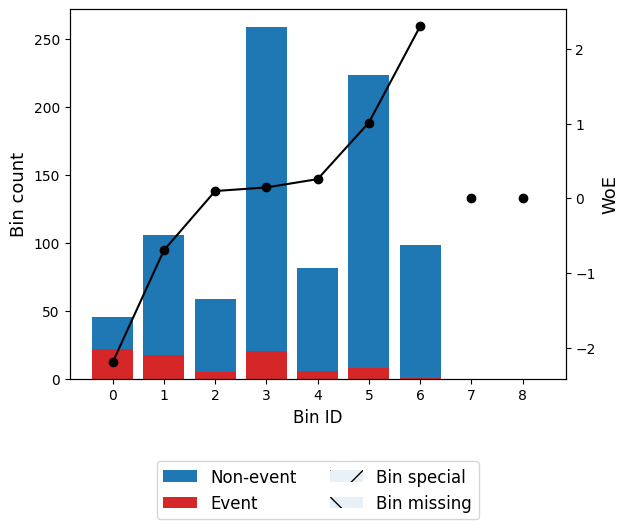

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  debt_to_equity





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.59)",64,0.073143,42,22,0.343750,-1.636007,0.357808,0.040323
1,"[-0.59, 0.01)",276,0.315429,241,35,0.126812,-0.353185,0.045410,0.005647
2,"[0.01, 0.68)",125,0.142857,121,4,0.032000,1.126862,0.116078,0.013788
3,"[0.68, 2.35)",148,0.169143,144,4,0.027027,1.300885,0.171687,0.020065
4,"[2.35, 4.26)",82,0.093714,81,1,0.012195,2.111815,0.189365,0.020066
5,"[4.26, 6.60)",44,0.050286,42,2,0.045455,0.761888,0.021489,0.002623
6,"[6.60, inf)",136,0.155429,123,13,0.095588,-0.035399,0.000198,0.000025
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,0.902036,0.102537


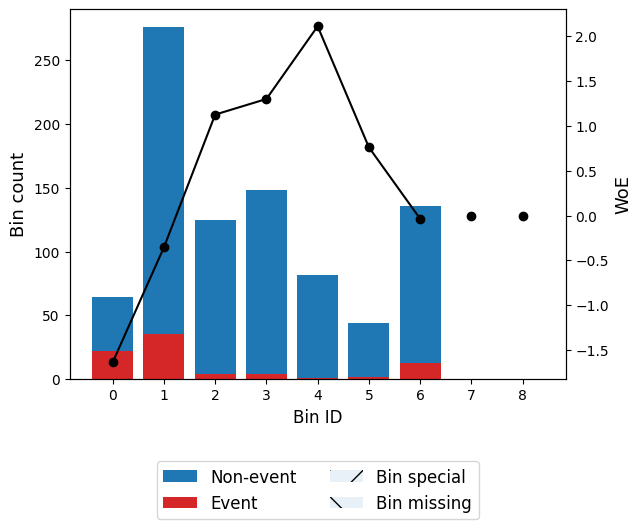

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  debt_to_ebit





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.19)",63,0.072000,45,18,0.285714,-1.366344,0.226194,0.026262
1,"[-0.19, 0.08)",348,0.397714,302,46,0.132184,-0.400849,0.075179,0.009335
2,"[0.08, 1.99)",90,0.102857,87,3,0.033333,1.084662,0.078676,0.009379
3,"[1.99, 5.04)",95,0.108571,94,1,0.010526,2.26066,0.239725,0.024870
4,"[5.04, 47.11)",200,0.228571,195,5,0.025000,1.380927,0.253902,0.029434
5,"[47.11, inf)",79,0.090286,71,8,0.101266,-0.099396,0.000929,0.000116
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,0.874605,0.099396


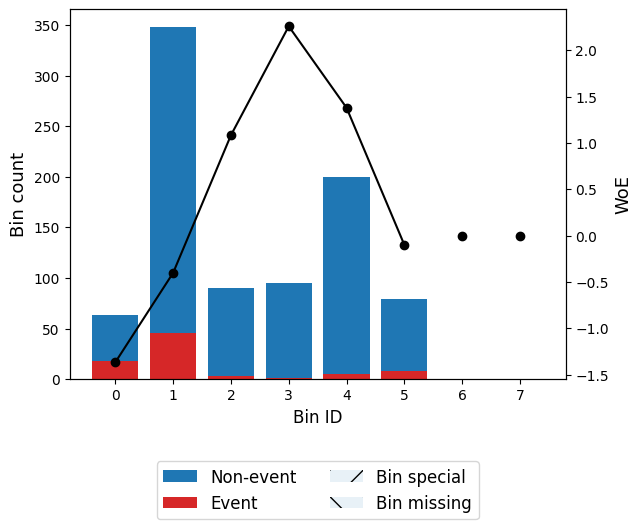

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  rev_to_debt





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.36)",325,0.371429,280,45,0.138462,-0.454507,0.092224,0.011430
1,"[0.36, 0.70)",53,0.060571,47,6,0.113208,-0.224246,0.003337,0.000416
2,"[0.70, 2.26)",162,0.185143,146,16,0.098765,-0.071616,0.000978,0.000122
3,"[2.26, 3.46)",91,0.104000,90,1,0.010989,2.217175,0.223945,0.023379
4,"[3.46, inf)",244,0.278857,231,13,0.053279,0.594834,0.077589,0.009558
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,0.398073,0.044906


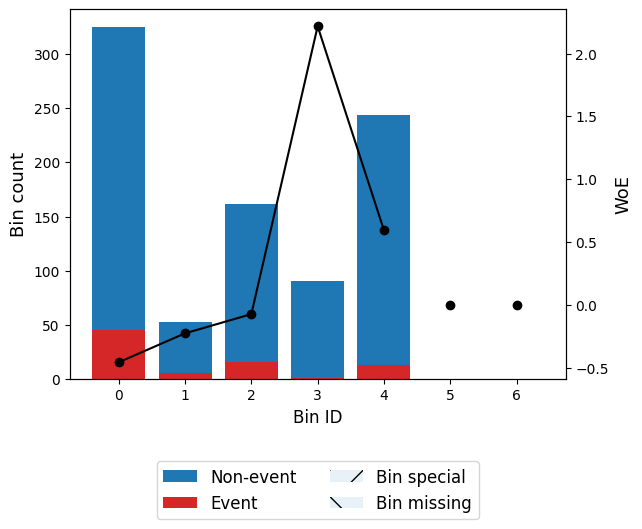

None

----------------------------------------------------------------------------------------------------
################ Feature Name :  num_of_check_decrease_30days_50pc





,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",815,0.931429,752,63,0.077301,0.196967,0.033352,0.004162
1,"[0.50, inf)",60,0.068571,42,18,0.300000,-1.435336,0.243039,0.028014
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,875,1.000000,794,81,0.092571,,0.276391,0.032176


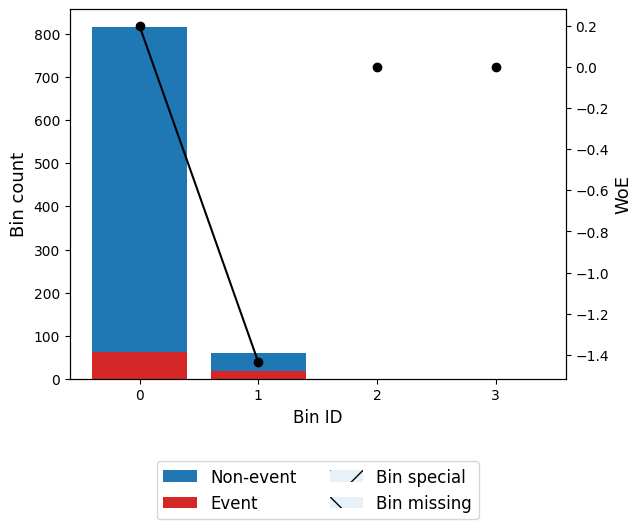

None

In [46]:
# WOE plots for features
for col in iv_score_df.index.values:
    print("-"*100)
    print("="*100)
    print("################ Feature Name : ", col)
    print("\n\n")
    optb = optbinning.OptimalBinning(dtype='numerical')
    optb.fit(df_all[col], df_all['def_flag'])

    binning_table = optb.binning_table
    display(binning_table.build())
    display(binning_table.plot(metric="woe"))

In [47]:
selected_features = iv_score_df[iv_score_df >= 0.2].index.values
train_cols = [col for col in df_all.columns if col in selected_features]
print(selected_features)
print(train_cols)

['equity' 'avg_receipt_dynamic' 'equity_to_assets' 'roa' 'no_check_30days'
 'npm' 'icr' 'avg_receipt_curr' 'ros' 'cur_ratio' 'debt_to_equity'
 'debt_to_ebit' 'rev_to_debt' 'num_of_check_decrease_30days_50pc']
['equity', 'icr', 'npm', 'ros', 'roa', 'cur_ratio', 'avg_receipt_dynamic', 'avg_receipt_curr', 'no_check_30days', 'num_of_check_decrease_30days_50pc', 'debt_to_ebit', 'equity_to_assets', 'rev_to_debt', 'debt_to_equity']


In [48]:
corr = df_all[train_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,equity,icr,npm,ros,roa,cur_ratio,avg_receipt_dynamic,avg_receipt_curr,no_check_30days,num_of_check_decrease_30days_50pc,debt_to_ebit,equity_to_assets,rev_to_debt,debt_to_equity
equity,1.000000,-0.000954,0.001523,0.003877,-0.001233,-0.004612,-0.002514,-0.008805,-0.018047,-0.009766,-0.001416,0.022146,-0.001365,-0.001770
icr,-0.000954,1.000000,0.002310,0.004293,-0.001747,-0.006883,-0.002448,0.079151,-0.023982,-0.013627,-0.002246,0.012030,-0.001638,-0.002009
npm,0.001523,0.002310,1.000000,0.053800,0.001427,0.012518,0.000791,0.012722,-0.068668,0.005810,0.001369,0.179655,0.001543,0.000951
ros,0.003877,0.004293,0.053800,1.000000,0.001417,0.024932,-0.001768,0.002963,-0.068263,-0.005114,0.000434,0.060880,0.001522,-0.005507
roa,-0.001233,-0.001747,0.001427,0.001417,1.000000,-0.005047,-0.002004,0.027645,-0.019880,-0.009239,-0.001500,0.036803,0.004128,-0.001839
cur_ratio,-0.004612,-0.006883,0.012518,0.024932,-0.005047,1.000000,0.047786,-0.001708,-0.055707,0.005964,-0.006179,0.137255,0.005479,-0.005336
avg_receipt_dynamic,-0.002514,-0.002448,0.000791,-0.001768,-0.002004,0.047786,1.000000,-0.001900,-0.035132,-0.016862,-0.002844,0.046095,-0.000500,-0.004271
avg_receipt_curr,-0.008805,0.079151,0.012722,0.002963,0.027645,-0.001708,-0.001900,1.000000,-0.066685,-0.021211,-0.002926,0.023800,0.027494,0.009956
no_check_30days,-0.018047,-0.023982,-0.068668,-0.068263,-0.019880,-0.055707,-0.035132,-0.066685,1.000000,0.028107,0.057260,-0.244163,-0.021727,0.078552
num_of_check_decrease_30days_50pc,-0.009766,-0.013627,0.005810,-0.005114,-0.009239,0.005964,-0.016862,-0.021211,0.028107,1.000000,-0.010742,-0.164791,-0.010018,0.015849


There are no features with a correlation greater than 0.65

In [49]:
cor_matrix = df_all[train_cols].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
corr_df = upper_tri.stack().reset_index()
corr_df.columns = ['row', 'col', 'corr']
corr_df = corr_df.drop_duplicates()
corr_df = corr_df.sort_values('corr', ascending=False)
corr_df = corr_df.query("corr >= 0.65")
corr_df['row_iv'] = corr_df['row'].map(iv_score_dict)
corr_df['col_iv'] = corr_df['col'].map(iv_score_dict)
corr_df

,row,col,corr,row_iv,col_iv


### Modeling

In [50]:
iv_score_df

equity                               2.762039
avg_receipt_dynamic                  1.918803
equity_to_assets                     1.657873
roa                                  1.552664
no_check_30days                      1.515372
npm                                  1.370430
icr                                  1.265137
avg_receipt_curr                     1.079151
ros                                  1.055673
cur_ratio                            1.050805
debt_to_equity                       0.902036
debt_to_ebit                         0.874605
rev_to_debt                          0.398073
num_of_check_decrease_30days_50pc    0.276391
dtype: float64

In [51]:
df_all[iv_score_df.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 80
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   equity                             875 non-null    int64  
 1   avg_receipt_dynamic                875 non-null    float64
 2   equity_to_assets                   875 non-null    float64
 3   roa                                875 non-null    float64
 4   no_check_30days                    875 non-null    int64  
 5   npm                                875 non-null    float64
 6   icr                                875 non-null    float64
 7   avg_receipt_curr                   875 non-null    int64  
 8   ros                                875 non-null    float64
 9   cur_ratio                          875 non-null    float64
 10  debt_to_equity                     875 non-null    float64
 11  debt_to_ebit                       875 non-null    float64


We have a total of 14 significant features

In [52]:
num_cols = df_all[iv_score_df.index].select_dtypes(include=['int64', 'float64']).columns.to_list()
selected_features = [col for col in selected_features]
train_cols = [col for col in df_all.columns if col in selected_features or col=='def_flag']
num_cols2 = num_cols.copy()
num_cols.append('def_flag')

# train valid split
train_data, valid_data = train_test_split(df_all[num_cols]
                                          , test_size=0.3
                                          , random_state=42
                                          , shuffle=True
                                          , stratify=df_all['def_flag'])

print(train_data.shape, valid_data.shape)

X_train = train_data[num_cols2].copy()
y_train = train_data['def_flag'].copy()

X_valid = valid_data[num_cols2].copy()
y_valid = valid_data['def_flag'].copy()

(612, 15) (263, 15)


In [53]:
df_all[num_cols]

,equity,avg_receipt_dynamic,equity_to_assets,roa,no_check_30days,npm,icr,avg_receipt_curr,ros,cur_ratio,debt_to_equity,debt_to_ebit,rev_to_debt,num_of_check_decrease_30days_50pc,def_flag
0,77586000,6.421053,0.261087,0.1580,0,0.0158,3228.3889,12200,0.0023,0.3850,2.830137,3.778613,12.577164,0,0
1,417949000,1.477387,0.174338,0.0534,0,0.0099,2.7974,117600,0.0262,0.1799,4.735987,8.695886,6.099951,0,0
2,290146000,0.789427,0.017480,0.0216,0,0.0068,14.1716,2142900,0.0479,0.0018,56.208733,28.465450,3.116461,0,0
3,651213000,1.698659,0.054732,0.0029,0,0.0140,1.0937,734500,-0.0260,0.0112,17.270778,47.555835,0.357540,0,0
4,1007672000,0.069812,0.676946,0.1491,0,0.1216,0.0000,33000,0.0426,1.2525,0.477222,2.418138,3.580769,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-4728000,0.505263,-0.900400,-0.7289,0,-0.3691,-14.4061,4800,0.0256,0.0075,0.000000,0.000000,0.000000,0,1
77,263414000,-2.828946,0.148545,0.1136,1,0.0229,0.0000,176600,0.0116,0.1147,0.000000,0.000000,0.000000,0,1
78,-462468000,-1.157951,-6.631697,-0.9964,1,-1.1770,-9.6173,3300,-0.2271,0.0001,0.000000,0.000000,0.000000,1,1
79,2263000,-2.825233,0.127106,0.0072,1,0.0037,0.0000,14000,0.0210,0.0109,6.867433,0.000000,2.212149,0,1


In [54]:
print(df_all['def_flag'].value_counts())
print(df_all['def_flag'].shape)
print('Default rate = ', df_all['def_flag'].value_counts()[1] *100 /df_all['def_flag'].shape[0])

0    794
1     81
Name: def_flag, dtype: int64
(875,)
Default rate =  9.257142857142858


### Logistic Regression

Coefficient: 
 [[-7.23193194e-09 -2.79612134e-05 -3.92076040e-06  1.84506444e-06
   1.76075161e-07 -7.96650722e-06 -7.61605995e-04 -3.88030986e-06
   1.34051741e-06 -1.44564835e-05 -5.72499791e-05 -5.00211094e-04
  -1.86422975e-05  1.03950320e-07]]
Intercept:  -7.126173784124744e-06
Подобранная величина отсечки: [0.3425006011917129]
Roc-Auc (Dev): 0.8640746009167063
Gini (Dev) : 0.7281492018334126
Roc-Auc (Val): 0.8675034867503487
Gini (Val) : 0.7350069735006974
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.45      0.62       239
           1       0.15      0.96      0.26        24

    accuracy                           0.50       263
   macro avg       0.57      0.71      0.44       263
weighted avg       0.91      0.50      0.59       263

Confusion matrix: 
 [[108 131]
 [  1  23]]
tn=108, fp=131, fn=1, tp=23


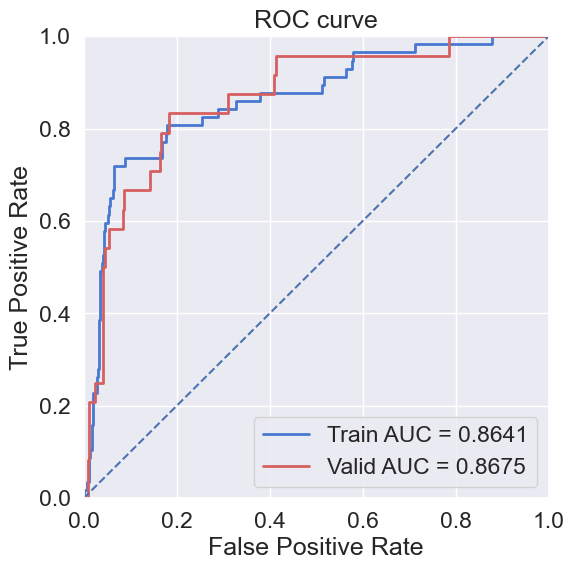

<AxesSubplot: title={'center': 'Feature Importance'}>

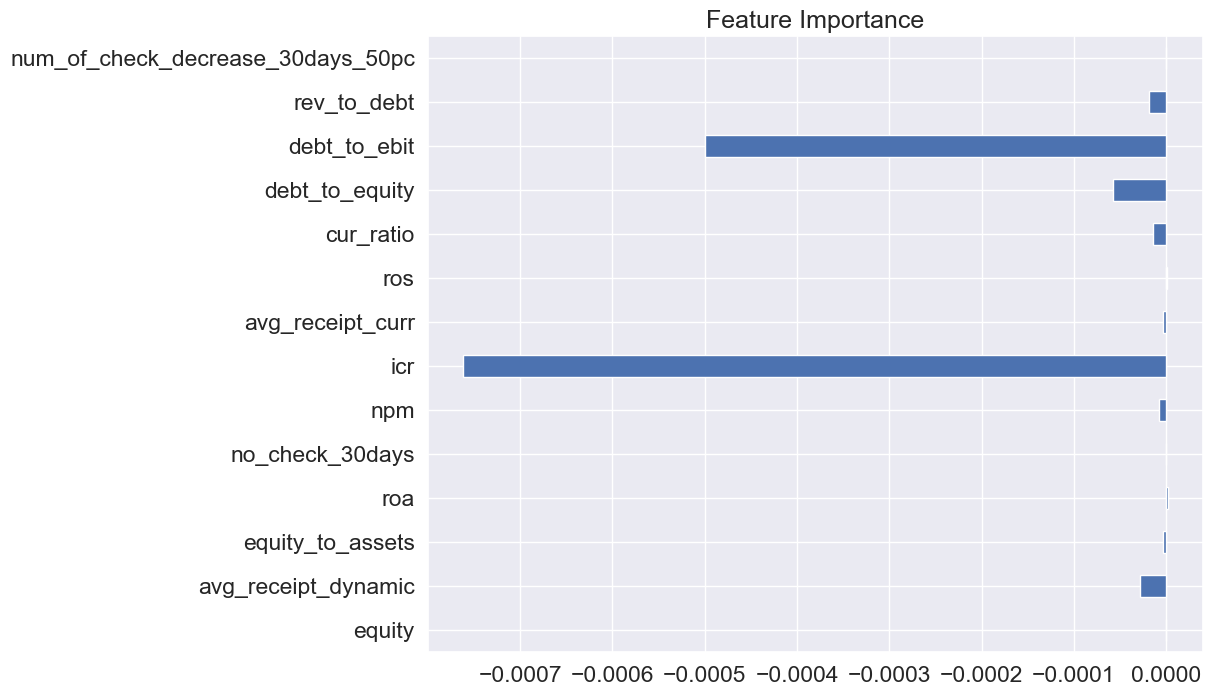

In [97]:
#строим многофакторную логистическую регрессию на заданных факторах
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
print('Coefficient: \n', logistic.coef_)
print('Intercept: ', logistic.intercept_[0])
#валидируем
preds_dev = logistic.predict_proba(X_train)[:, 1]
preds_val = logistic.predict_proba(X_valid)[:, 1]
plot_graph_and_metrics(y_train, preds_dev, y_valid, preds_val, treshhold_custom=0.0925)

importance = logistic.coef_[0]
feat_importances = pd.Series(importance, index=X_train.columns)
plt.figure(figsize=(10, 8))
feat_importances.plot(kind='barh',title = 'Feature Importance')

### Random Forest

Подобранная величина отсечки: [0.51]
Roc-Auc (Dev): 1.0
Gini (Dev) : 1.0
Roc-Auc (Val): 0.9598152022315202
Gini (Val) : 0.9196304044630403
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       239
           1       0.44      0.92      0.59        24

    accuracy                           0.89       263
   macro avg       0.72      0.90      0.76       263
weighted avg       0.94      0.89      0.90       263

Confusion matrix: 
 [[211  28]
 [  2  22]]
tn=211, fp=28, fn=2, tp=22


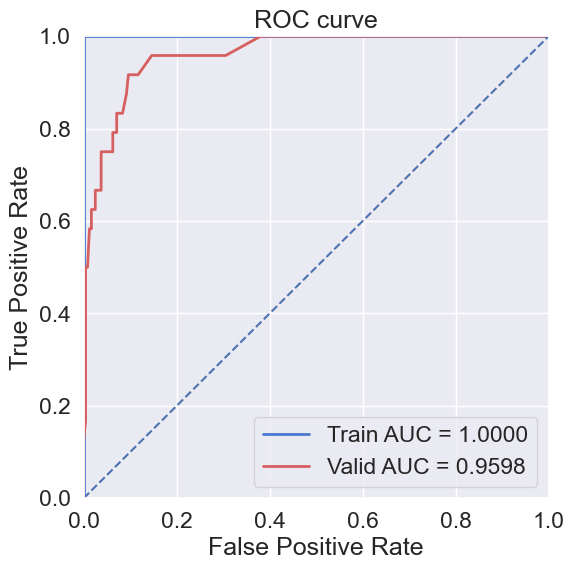

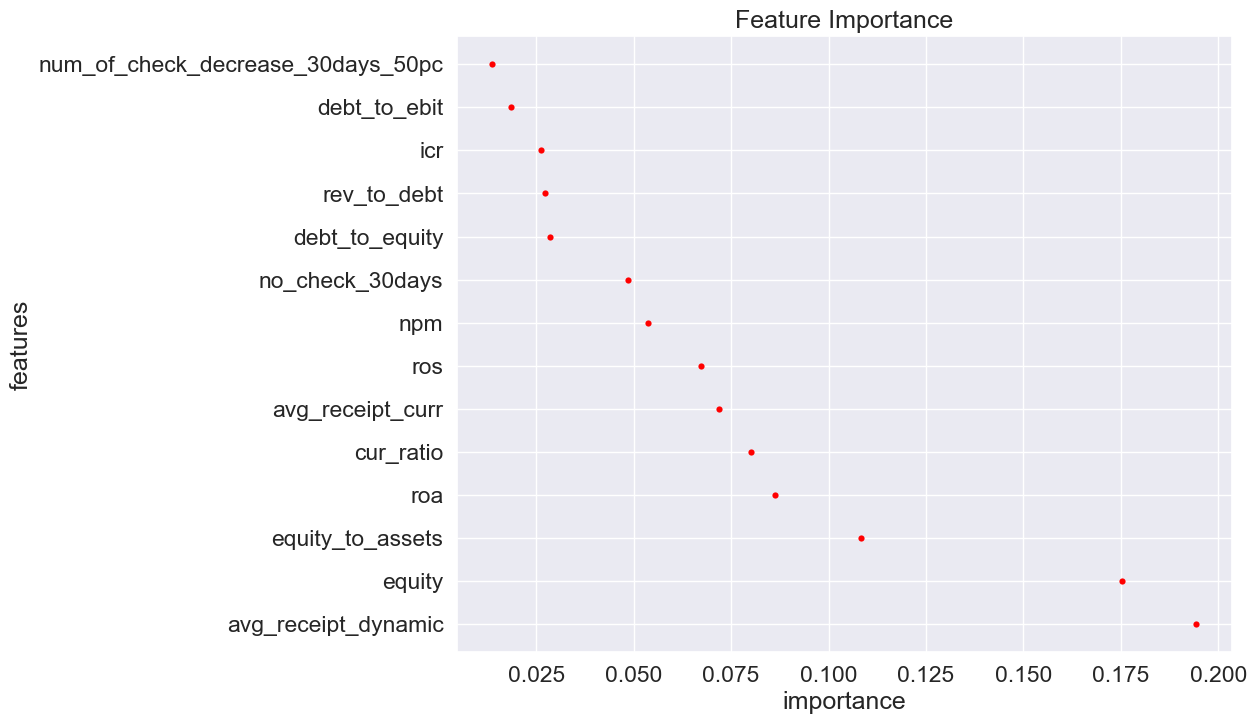

In [58]:
model_RFC =  RandomForestClassifier(random_state=42)
model_RFC.fit(X_train, y_train)
#валидируем
preds_dev = model_RFC.predict_proba(X_train)[:, 1]
preds_val = model_RFC.predict_proba(X_valid)[:, 1]
plot_graph_and_metrics(y_train, preds_dev, y_valid, preds_val, treshhold_custom=0.0925)
plot_importance(model_RFC, df_all[num_cols2], 20) 

### Decision Tree

Подобранная величина отсечки: [1.0]
Roc-Auc (Dev): 1.0
Gini (Dev) : 1.0
Roc-Auc (Val): 0.7374476987447699
Gini (Val) : 0.4748953974895398
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       239
           1       0.67      0.50      0.57        24

    accuracy                           0.93       263
   macro avg       0.81      0.74      0.77       263
weighted avg       0.93      0.93      0.93       263

Confusion matrix: 
 [[233   6]
 [ 12  12]]
tn=233, fp=6, fn=12, tp=12


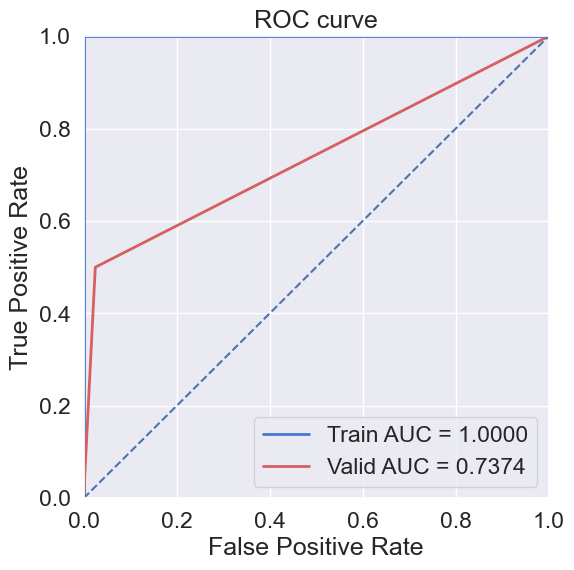

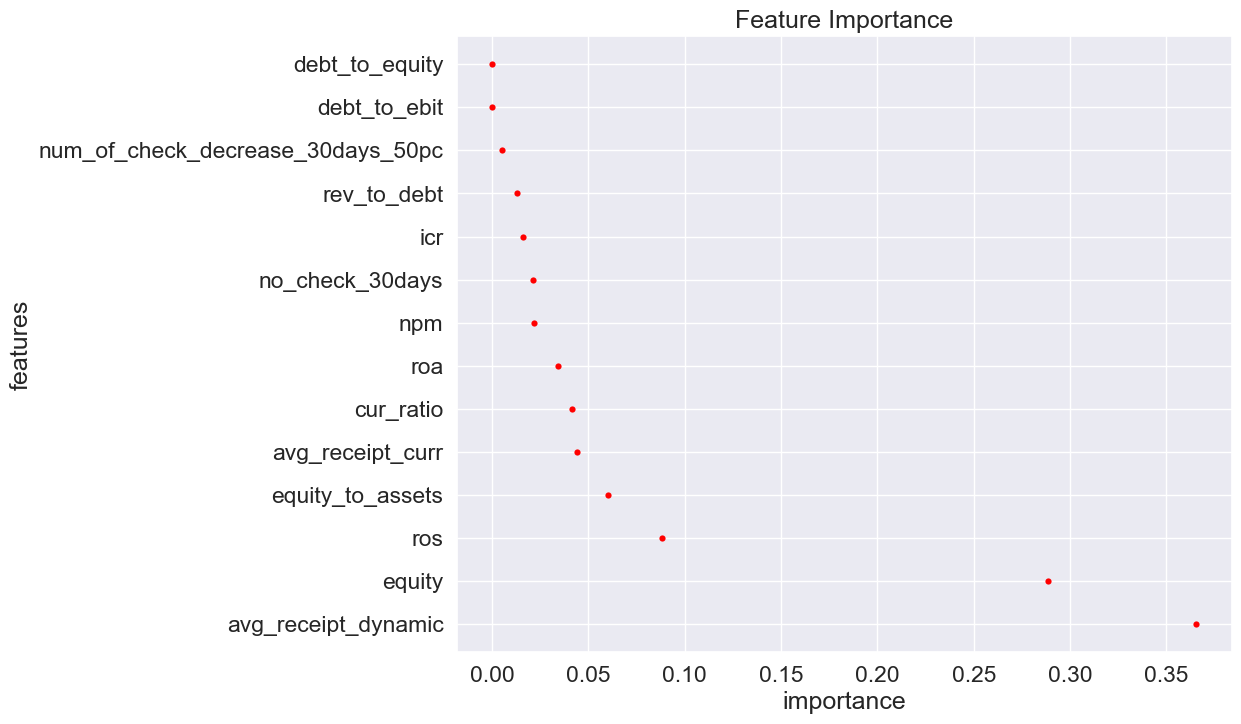

In [60]:
model_DTC =  DecisionTreeClassifier(random_state=42)
model_DTC.fit(X_train, y_train)
#валидируем
preds_dev = model_DTC.predict_proba(X_train)[:, 1]
preds_val = model_DTC.predict_proba(X_valid)[:, 1]
plot_graph_and_metrics(y_train, preds_dev, y_valid, preds_val, treshhold_custom=0.0925)
plot_importance(model_DTC, df_all[num_cols2], 20) 

### SVC

Подобранная величина отсечки: [0.068551208294533]
Roc-Auc (Dev): 0.15596649280859806
Gini (Dev) : -0.6880670143828038
Roc-Auc (Val): 0.15847280334728034
Gini (Val) : -0.6830543933054394
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       239
           1       0.00      0.00      0.00        24

    accuracy                           0.87       263
   macro avg       0.45      0.48      0.46       263
weighted avg       0.82      0.87      0.84       263

Confusion matrix: 
 [[228  11]
 [ 24   0]]
tn=228, fp=11, fn=24, tp=0


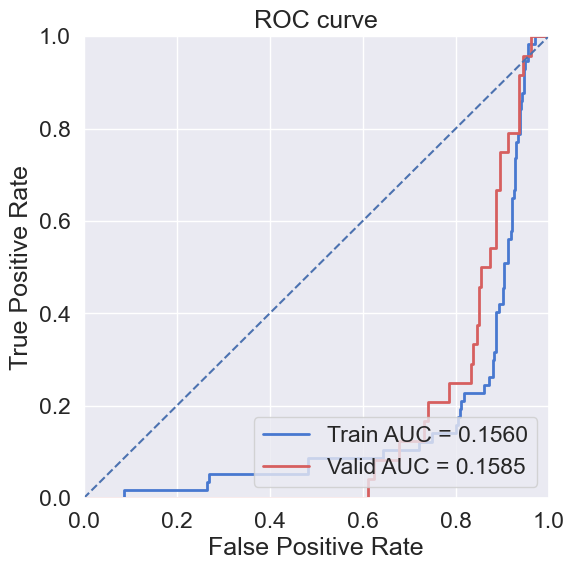

In [61]:
model_SVC = SVC(random_state=42, probability=True)
model_SVC.fit(X_train, y_train)

#валидируем
preds_dev = model_SVC.predict_proba(X_train)[:, 1]
preds_val = model_SVC.predict_proba(X_valid)[:, 1]
plot_graph_and_metrics(y_train, preds_dev, y_valid, preds_val, treshhold_custom=0.0925)

### KNN

Подобранная величина отсечки: [0.3333333333333333]
Roc-Auc (Dev): 0.9767662399241346
Gini (Dev) : 0.9535324798482692
Roc-Auc (Val): 0.7067642956764296
Gini (Val) : 0.41352859135285924
Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       239
           1       0.30      0.54      0.38        24

    accuracy                           0.84       263
   macro avg       0.62      0.71      0.65       263
weighted avg       0.89      0.84      0.86       263

Confusion matrix: 
 [[208  31]
 [ 11  13]]
tn=208, fp=31, fn=11, tp=13


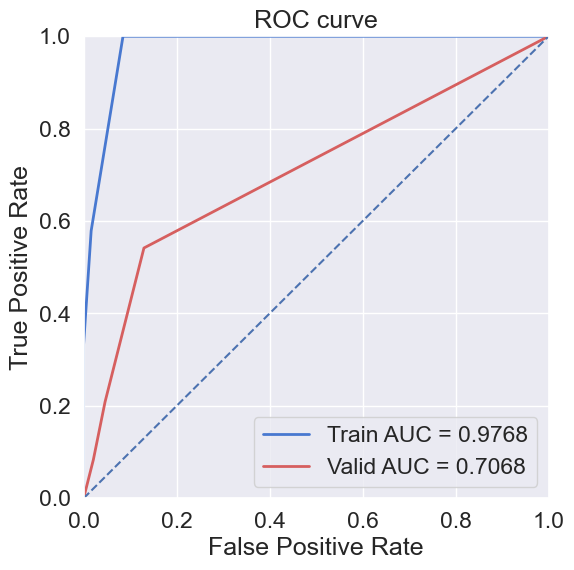

In [62]:
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train, y_train)
#валидируем
preds_dev = model_KNN.predict_proba(X_train)[:, 1]
preds_val = model_KNN.predict_proba(X_valid)[:, 1]
plot_graph_and_metrics(y_train, preds_dev, y_valid, preds_val, treshhold_custom=0.0925)

### Cat-Boost classifier

Roc-Auc (Dev): 0.9912280701754386
Gini (Dev) : 0.9824561403508771
Roc-Auc (Val): 0.7895746164574617
Gini (Val) : 0.5791492329149235
Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       239
           1       0.93      0.58      0.72        24

    accuracy                           0.96       263
   macro avg       0.95      0.79      0.85       263
weighted avg       0.96      0.96      0.95       263

Confusion matrix: 
 [[238   1]
 [ 10  14]]
tn=238, fp=1, fn=10, tp=14


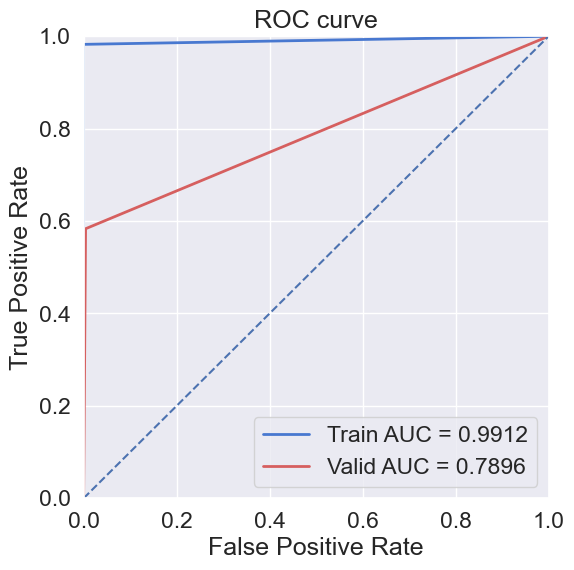

In [63]:
model_CBC = CatBoostClassifier(random_state=42,verbose=0).fit(X_train, y_train)

preds_dev = model_CBC.predict(X_train)
preds_val = model_CBC.predict(X_valid)
train_roc_auc_score = roc_auc_score(y_train, preds_dev)
print('Roc-Auc (Dev):', train_roc_auc_score)
print('Gini (Dev) :', 2*train_roc_auc_score-1)
valid_roc_auc_score = roc_auc_score(y_valid, preds_val)
print('Roc-Auc (Val):', valid_roc_auc_score)
print('Gini (Val) :', 2*valid_roc_auc_score-1)
print('Classification report: \n', classification_report(y_valid, preds_val))
print('Confusion matrix: \n', confusion_matrix(y_valid, preds_val))
tn, fp, fn, tp = confusion_matrix(y_valid, preds_val).ravel()
print(f'{tn=}, {fp=}, {fn=}, {tp=}')

#выводим график ROC кривой
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(6, 6))
fpr, tpr, thresholds = roc_curve(y_train, preds_dev)
fpr1, tpr1, thresholds1 = roc_curve(y_valid, preds_val)

plt.plot(fpr, tpr, lw=2, color='b', label='Train AUC = {0:.4f}'.format(train_roc_auc_score))
plt.plot(fpr1, tpr1, lw=2, color='r', label='Valid AUC = {0:.4f}'.format(valid_roc_auc_score))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

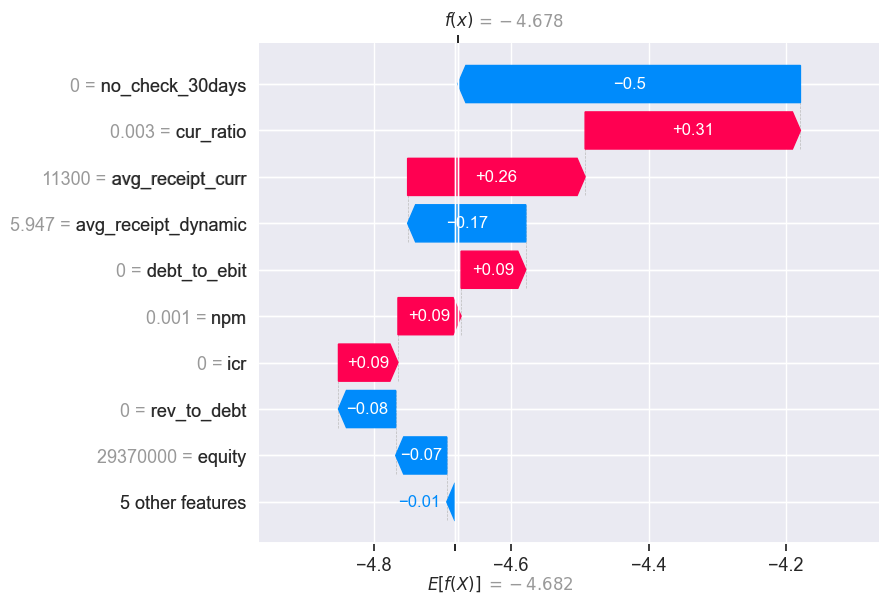

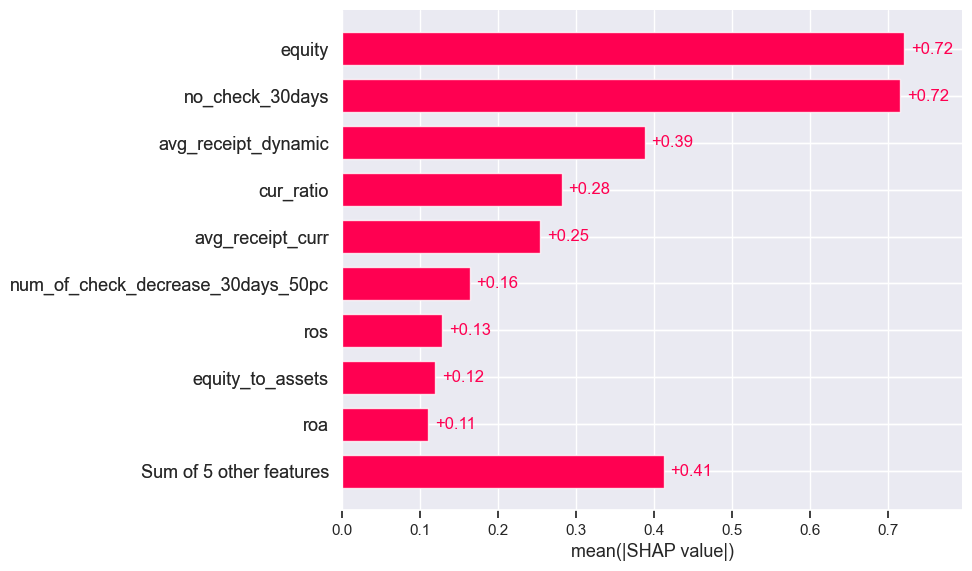

In [65]:
explainer = shap.Explainer(model_CBC)
shap_values = explainer(X_train)

shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)

All ROC AUC plots in one figure

<Figure size 640x480 with 0 Axes>

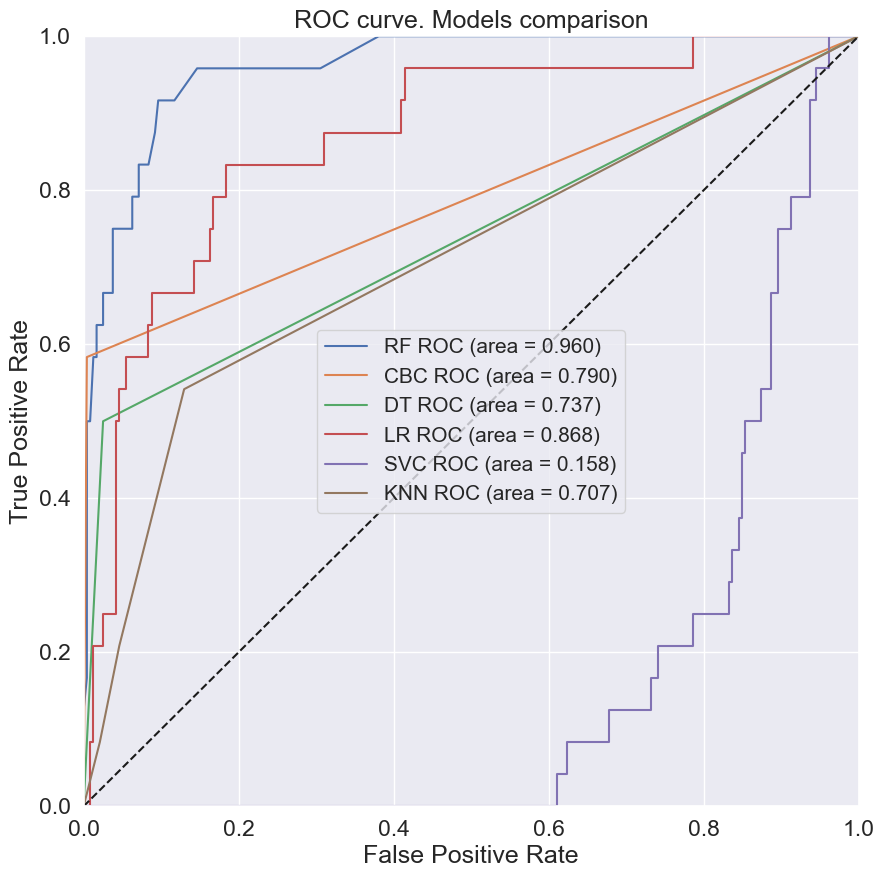

In [66]:
pl.clf()
plt.figure(figsize=(10, 10))

#Random Forest
probas = model_RFC.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probas)
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % ('RF', roc_auc))

#CBC
probas = model_CBC.predict(X_valid)
fpr, tpr, thresholds = roc_curve(y_valid, probas)
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % ('CBC', roc_auc))

#Decision Tree
probas = model_DTC.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probas)
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % ('DT', roc_auc))

#LR
probas = logistic.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probas)
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % ('LR', roc_auc))

#SVC
probas = model_SVC.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probas)
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % ('SVC', roc_auc))

#KNN
probas =  model_KNN.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, probas)
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % ('KNN', roc_auc))


pl.legend(loc='lower right')
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC curve. Models comparison')
pl.legend(loc=0, fontsize='small')
pl.show()

## Logistic Regression with binning

Let's search for the best hyperparameters

In [67]:
logistic = LogisticRegression()
parameters = [{'solver': ['newton-cg', 'liblinear', 'sag', 'saga']}
              ,{'penalty':['none', 'elasticnet', 'l1', 'l2']}
              ,{'C':[0.001, 0.01, 0.1, 1, 10, 100]}
              ,{'max_iter':[10,100,1000,10000]}]
grid_search = GridSearchCV(estimator = logistic,  
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_iter': 10}

Perform binning and build a grief card from 300 to 850 points

In [73]:
binning_process = optbinning.BinningProcess(                             
    variable_names=num_cols2,
)
estimator = LogisticRegression()

# scorecard
scorecard = optbinning.Scorecard(
    binning_process=binning_process,
    estimator=estimator, 
    scaling_method="min_max",
    scaling_method_params={"min": 300, "max": 850},
)

# model fitting
scorecard.fit(X_train, y_train)

# scorecard table
scorecard_df = scorecard.table(style="detailed")
scorecard_df.head()

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,equity,0,"(-inf, 2442500.00)",90,0.147059,48,42,0.466667,-2.142385,1.393312,0.147013,-0.853738,-9.882772
1,equity,1,"[2442500.00, 20252500.00)",50,0.081699,43,7,0.140000,-0.460627,0.020880,0.002587,-0.853738,30.282120
2,equity,2,"[20252500.00, 34823500.00)",47,0.076797,45,2,0.042553,0.837598,0.038524,0.004679,-0.853738,61.287213
3,equity,3,"[34823500.00, 56151500.00)",44,0.071895,43,1,0.022727,1.485283,0.089018,0.010205,-0.853738,76.755658
4,equity,4,"[56151500.00, 116522000.00)",91,0.148693,89,2,0.021978,1.519572,0.190361,0.021741,-0.853738,77.574573


## Metrics

Выведем всякие метрики

In [74]:
print(df_all['def_flag'].value_counts())
print(df_all['def_flag'].shape)
print('Default rate = ', df_all['def_flag'].value_counts()[1] *100 /df_all['def_flag'].shape[0])

0    794
1     81
Name: def_flag, dtype: int64
(875,)
Default rate =  9.257142857142858


Подобранная величина отсечки: [0.07744894896500032]
Roc-Auc (Dev): 0.9644065117749329
Gini (Dev) : 0.9288130235498657
Roc-Auc (Val): 0.9651324965132497
Gini (Val) : 0.9302649930264995
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       239
           1       0.40      0.92      0.56        24

    accuracy                           0.87       263
   macro avg       0.70      0.89      0.74       263
weighted avg       0.94      0.87      0.89       263

Confusion matrix: 
 [[206  33]
 [  2  22]]
tn=206, fp=33, fn=2, tp=22


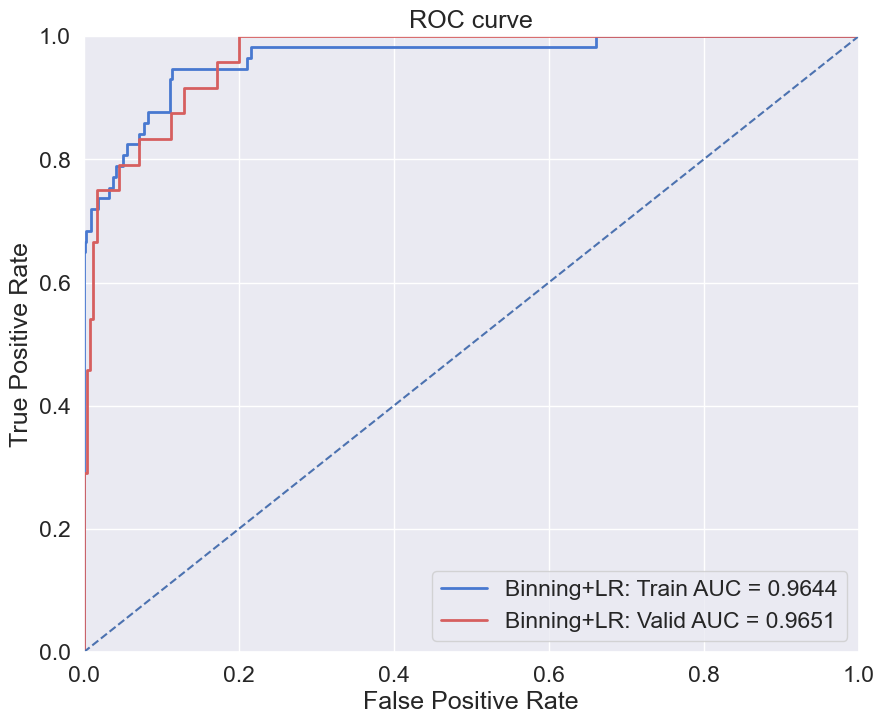

In [80]:
#валидируем
preds_dev = scorecard.predict_proba(X_train)[:, 1]
preds_val = scorecard.predict_proba(X_valid)[:, 1]
treshhold = Find_Optimal_Cutoff(y_train, preds_dev)
print('Подобранная величина отсечки:',treshhold)
pred = [1 if i > 0.0952 else 0 for i in preds_val]
#выводим результаты подгонки моделей
train_roc_auc_score = roc_auc_score(y_train, preds_dev)
print('Roc-Auc (Dev):', train_roc_auc_score)
print('Gini (Dev) :', 2*train_roc_auc_score-1)
valid_roc_auc_score = roc_auc_score(y_valid, preds_val)
print('Roc-Auc (Val):', valid_roc_auc_score)
print('Gini (Val) :', 2*valid_roc_auc_score-1)
print('Classification report: \n', classification_report(y_valid, pred))
print('Confusion matrix: \n', confusion_matrix(y_valid, pred))
tn, fp, fn, tp = confusion_matrix(y_valid, pred).ravel()
print(f'{tn=}, {fp=}, {fn=}, {tp=}')

#выводим график ROC кривой
sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_train, preds_dev)
fpr1, tpr1, thresholds1 = roc_curve(y_valid, preds_val)

plt.plot(fpr, tpr, lw=2, color='b', label='Binning+LR: Train AUC = {0:.4f}'.format(train_roc_auc_score))
plt.plot(fpr1, tpr1, lw=2, color='r', label='Binning+LR: Valid AUC = {0:.4f}'.format(valid_roc_auc_score))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [81]:
scorecard.information

<bound method Scorecard.information of Scorecard(binning_process=BinningProcess(variable_names=['equity',
                                                         'avg_receipt_dynamic',
                                                         'equity_to_assets',
                                                         'roa',
                                                         'no_check_30days',
                                                         'npm', 'icr',
                                                         'avg_receipt_curr',
                                                         'ros', 'cur_ratio',
                                                         'debt_to_equity',
                                                         'debt_to_ebit',
                                                         'rev_to_debt',
                                                         'num_of_check_decrease_30days_50pc']),
          estimator=LogisticRegression(), scaling_method

### Checking learning with crossvalidation

The scoring here is a custom function. The function prints the classification_report of each fold and returns the roc auc score

In [82]:
binning_process = BinningProcess(variable_names=num_cols2)
data_binned_cv = binning_process.fit_transform(df_all[num_cols2], df_all['def_flag'])
logreg=LogisticRegression()
predicted = cross_validate(logreg, data_binned_cv, df_all['def_flag']
                           , cv=10, scoring=make_scorer(classification_report_with_accuracy_score))
print(predicted)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.83      0.62      0.71         8

    accuracy                           0.95        88
   macro avg       0.90      0.81      0.84        88
weighted avg       0.95      0.95      0.95        88

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.88      0.93         8

    accuracy                           0.99        88
   macro avg       0.99      0.94      0.96        88
weighted avg       0.99      0.99      0.99        88

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        80
           1       1.00      0.62      0.77         8

    accuracy                           0.97        88
   macro avg       0.98      0.81      0.88        88
weighted avg       0.97      0.97      0.96        88

              preci

In [83]:
print(' roc auc score array ',predicted['test_score'])

 roc auc score array  [0.80625    0.9375     0.8125     0.8        0.83333333 1.
 0.8125     0.86867089 0.72468354 0.78718354]


In [84]:
train_data

,equity,avg_receipt_dynamic,equity_to_assets,roa,no_check_30days,npm,icr,avg_receipt_curr,ros,cur_ratio,debt_to_equity,debt_to_ebit,rev_to_debt,num_of_check_decrease_30days_50pc,def_flag
346,29370000,5.947368,0.314862,0.0005,0,0.0005,0.0000,11300,0.0535,0.0032,0.000000,0.000000,0.000000,0,0
6,293769000,2.517375,0.368739,0.3482,0,0.0971,56.5286,65200,0.2248,0.5322,1.713431,1.185671,5.218592,0,0
320,500000,1.326347,0.034640,0.0529,0,0.0726,0.0000,44300,0.0988,0.3527,27.868000,0.000000,4.832640,0,0
52,-88556000,0.000000,-0.522849,-0.1378,0,-3.5970,-1.5053,0,-3.1312,0.0003,-3.506911,-21.592018,0.021429,1,1
733,655983000,0.000000,0.762064,0.0183,1,0.0283,23.0598,0,0.0455,0.0667,0.312226,9.664732,2.746923,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,135288000,0.706490,0.928595,0.6165,0,0.0675,202.6206,13736700,0.0859,20.5477,0.076895,0.078867,149.294338,0,0
637,888206000,0.000000,0.150644,0.0735,0,0.0206,15.5114,0,0.0059,0.3311,0.000000,0.000000,0.000000,0,0
287,228582000,1.008189,0.975625,0.0551,0,0.1259,0.0000,504800,0.1387,0.7757,0.000000,0.000000,0.000000,0,0
424,259516000,0.783660,0.570126,0.1320,0,0.0423,2161.2308,1490600,0.0092,0.4348,0.754000,3.482257,5.676683,0,0


### Scores

In [85]:
train_data['predict_proba'] = preds_dev
valid_data['predict_proba'] = preds_val
train_data['score'] = scorecard.score(X_train)
valid_data['score'] = scorecard.score(X_valid)

In [86]:
union_dfs = pd.concat([train_data, valid_data])
union_dfs

,equity,avg_receipt_dynamic,equity_to_assets,roa,no_check_30days,npm,icr,avg_receipt_curr,ros,cur_ratio,debt_to_equity,debt_to_ebit,rev_to_debt,num_of_check_decrease_30days_50pc,def_flag,predict_proba,score
346,29370000,5.947368,0.314862,0.0005,0,0.0005,0.0000,11300,0.0535,0.0032,0.000000,0.000000,0.000000,0,0,0.006621,656.128963
6,293769000,2.517375,0.368739,0.3482,0,0.0971,56.5286,65200,0.2248,0.5322,1.713431,1.185671,5.218592,0,0,0.000387,735.726131
320,500000,1.326347,0.034640,0.0529,0,0.0726,0.0000,44300,0.0988,0.3527,27.868000,0.000000,4.832640,0,0,0.033824,609.730136
52,-88556000,0.000000,-0.522849,-0.1378,0,-3.5970,-1.5053,0,-3.1312,0.0003,-3.506911,-21.592018,0.021429,1,1,0.944002,436.933723
733,655983000,0.000000,0.762064,0.0183,1,0.0283,23.0598,0,0.0455,0.0667,0.312226,9.664732,2.746923,0,0,0.050436,598.068812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,40268000,0.000000,0.030778,0.0156,0,0.0088,0.5125,206000,0.0120,0.3861,31.490613,33.007887,1.881172,0,0,0.010647,642.729513
232,198281000,7.500000,0.755705,0.1194,0,0.0677,0.0000,24000,0.0794,0.4206,0.323263,0.000000,8.943242,0,0,0.004522,666.854654
366,108250000,0.428571,0.470066,0.0006,0,0.0012,0.0000,768300,0.0259,0.0493,0.000000,0.000000,0.000000,0,0,0.004892,664.644286
112,54660000,1.185688,0.110133,0.0277,0,0.0088,1.5196,130900,0.0575,0.2663,8.079894,15.513260,3.316791,0,0,0.001003,709.073387


In [87]:
union_dfs.to_excel('scores.xlsx')

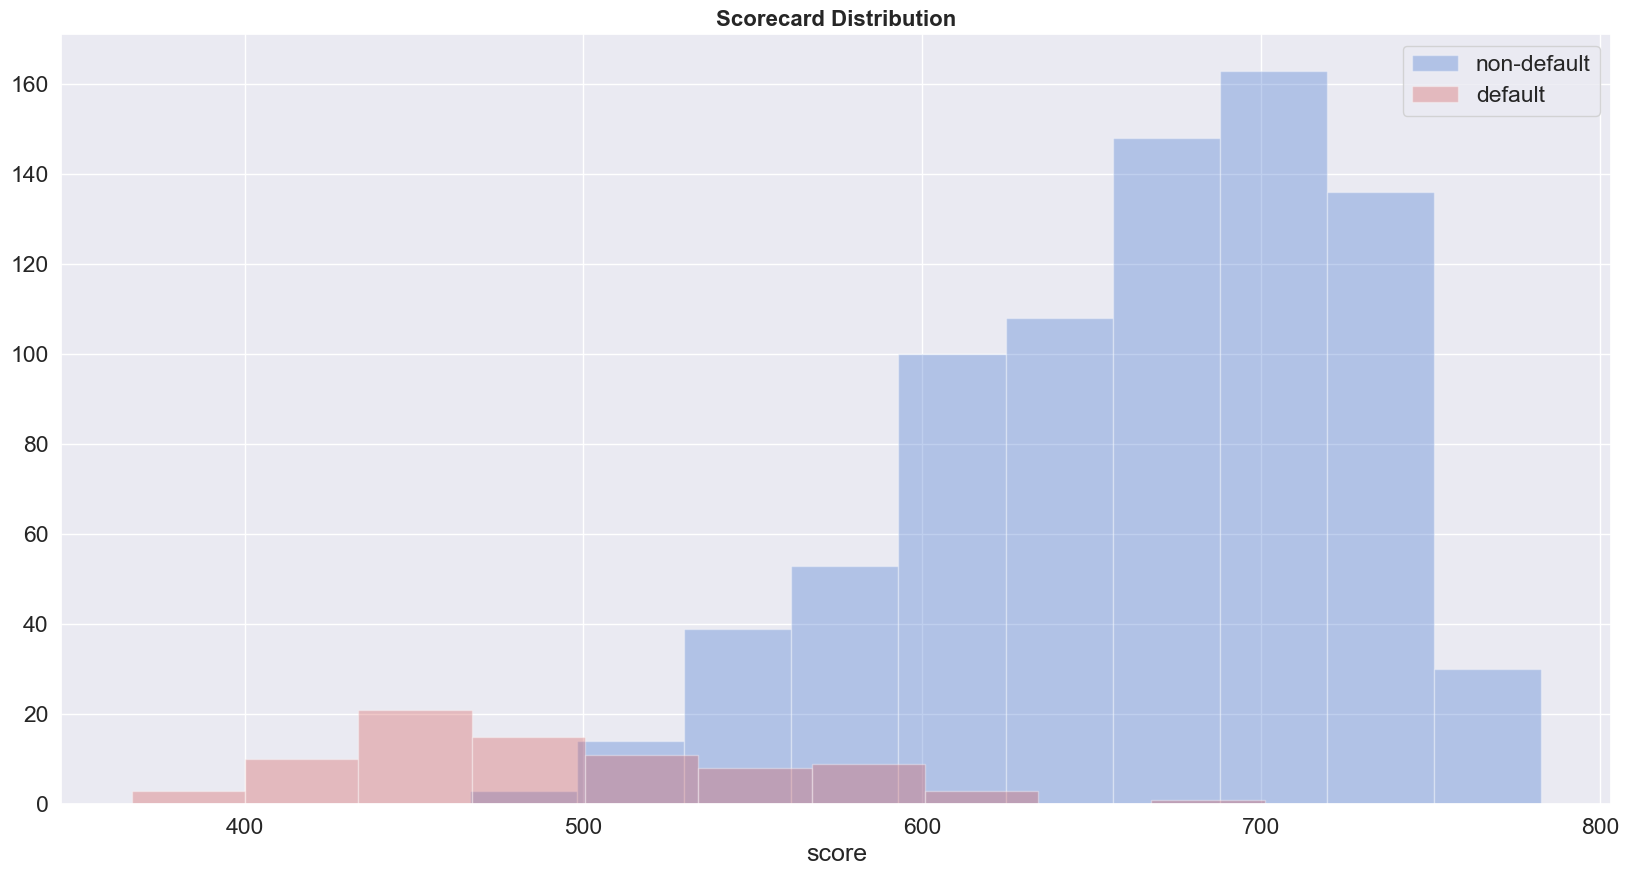

In [88]:
y_test = union_dfs['def_flag']
score = union_dfs['score']

mask = y_test == 0

fig, ax = plt.subplots(figsize=(20,10))
plt.hist(score[mask], label="non-default", color="b", alpha=0.35)
plt.hist(score[~mask], label="default", color="r", alpha=0.35)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=16)
plt.xlabel("score")
plt.legend()
plt.show()

On the figure it can be seen that around the value 500 the defaults and non-defaults begin to overlap, although the defaults can be detected at 700 on the scoring map

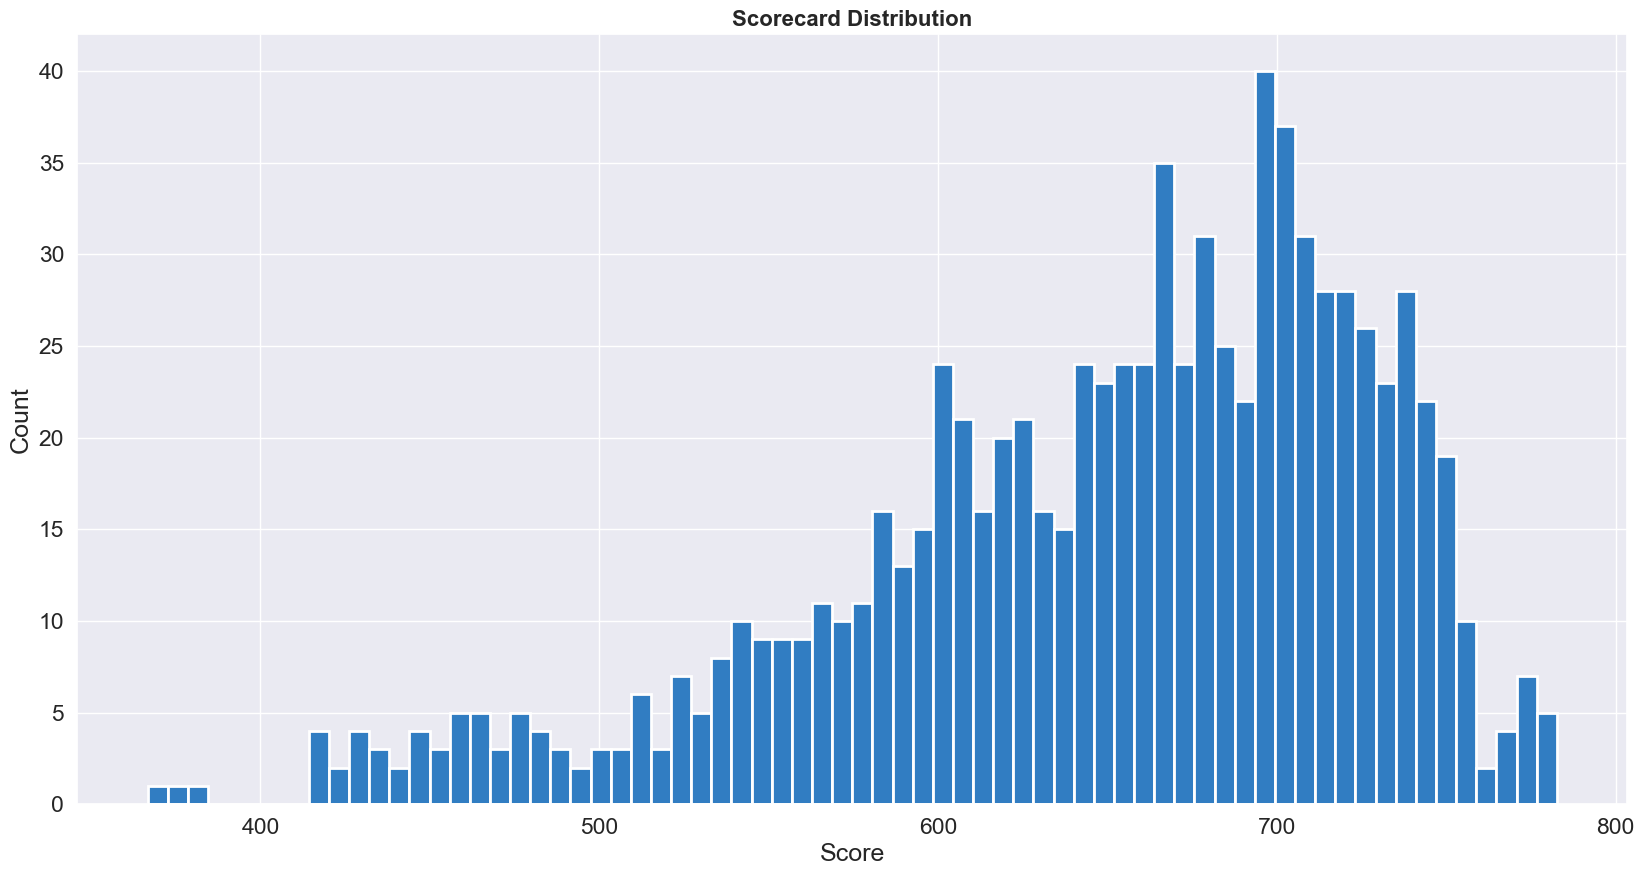

In [89]:
# Plot Distribution of Scores
plt.figure(figsize=(20,10))

plt.hist(score,
         bins=70,
         edgecolor='white',
         color = '#317DC2',
         linewidth=2)

plt.title('Scorecard Distribution', fontweight="bold", fontsize=16)
plt.xlabel('Score')
plt.ylabel('Count');

Let's plot the distribution of cramps depending on the probability of default

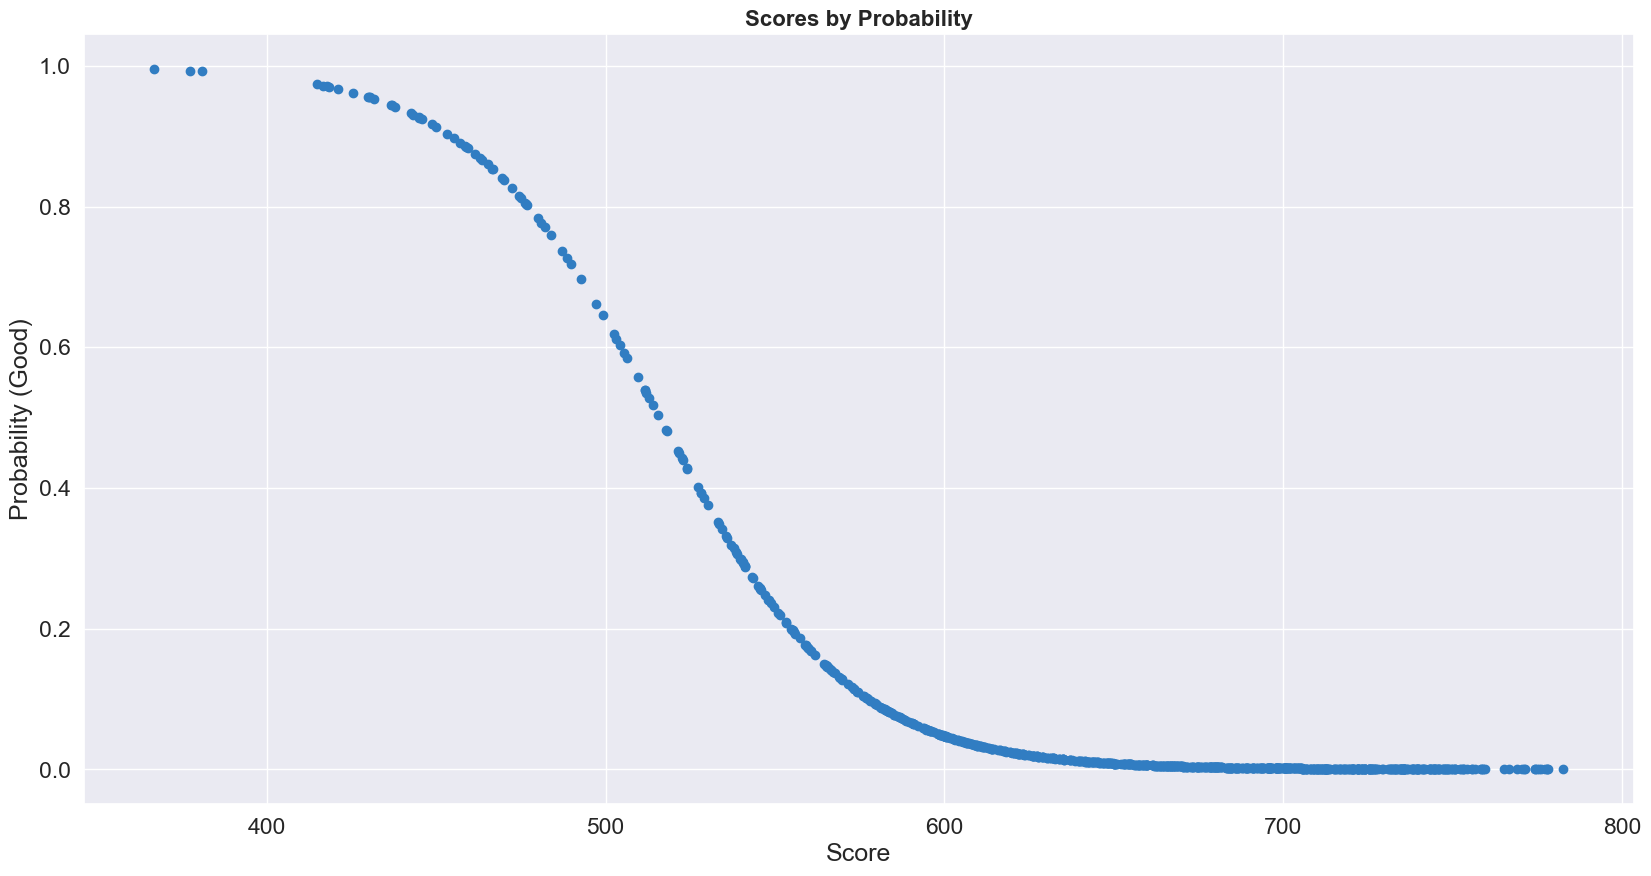

In [90]:
# Plot Scores Against Probabilities
plt.figure(figsize=(20,10))

plt.scatter(x=score,
            y=union_dfs['predict_proba'],
            #data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=16)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

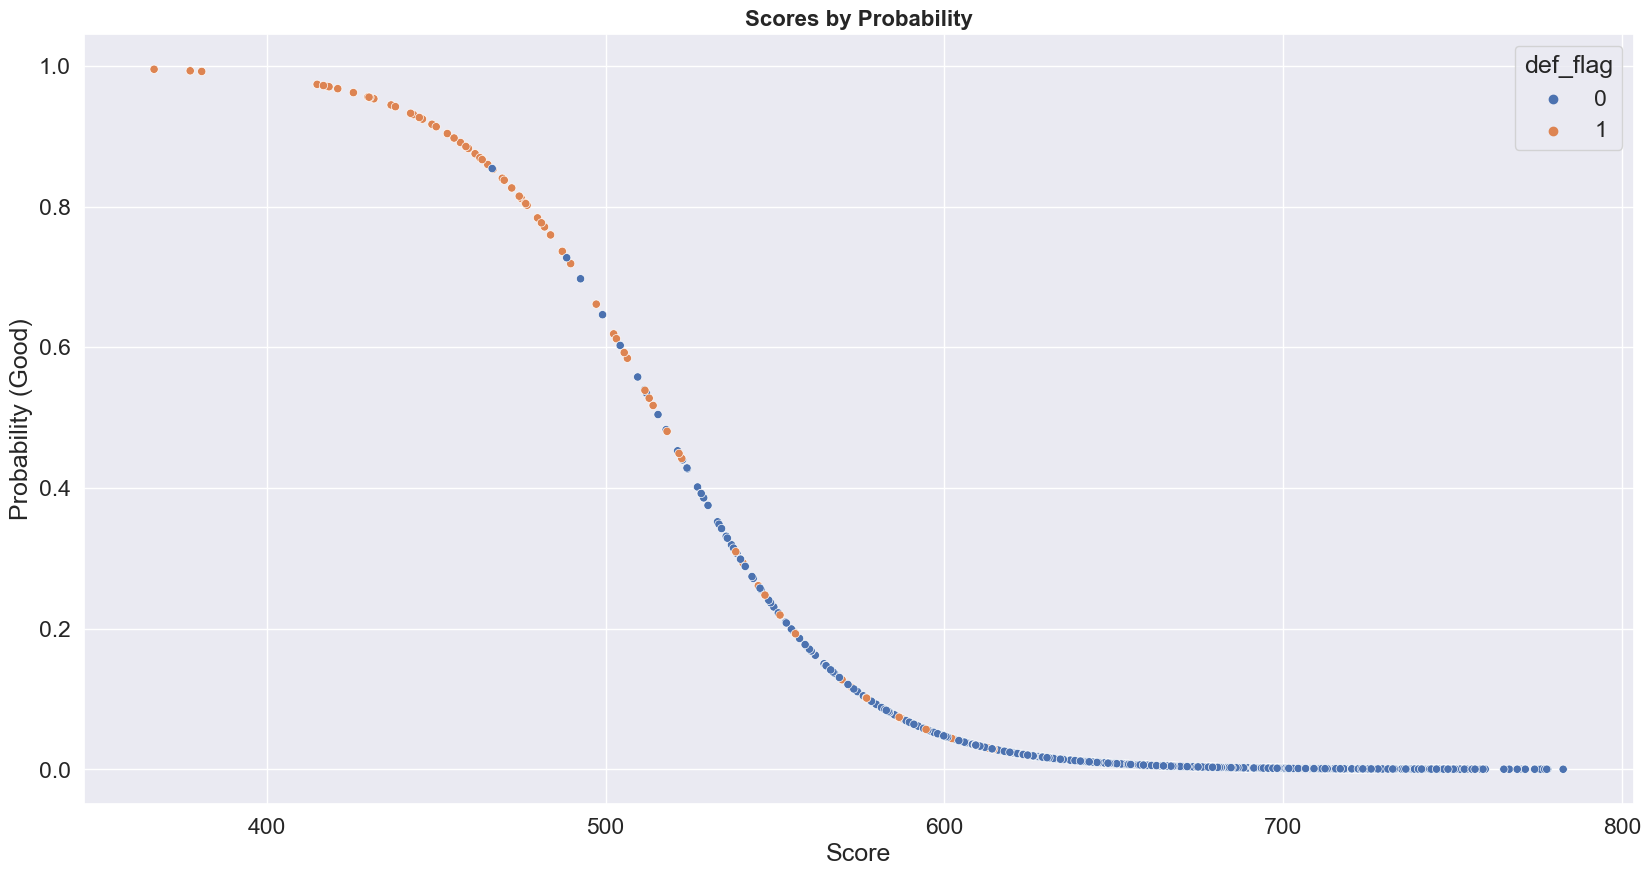

In [91]:
# Plot Scores Against Probabilities
plt.figure(figsize=(20,10))
sns.scatterplot(data=union_dfs, x="score", y="predict_proba", hue="def_flag")
plt.title('Scores by Probability', fontweight="bold", fontsize=16)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');